# Technical Validation

Author: Thiago Nascimento (thiago.nascimento@eawag.ch)

This notebook is used to retrieve and concatenate the BAFU dataset into hourly and daily resolutions. The output is one file per catchemnt (similar to the CAMELS_CH), with 5 columns: date, electric_cond(µS/cm), pH(-), temperature(°C) & oxygen_conc(mg/l)

## Requirements
**Python:**

* Python>=3.6
* Jupyter
* geopandas=0.10.2
* numpy
* os
* pandas=2.1.3
* scipy=1.9.0
* tqdm

Check the Github repository for an environment.yml (for conda environments) or requirements.txt (pip) file.

**Files:**

* 


**Directory:**

* Clone the GitHub directory locally
* Place any third-data variables in their respective directory.
* ONLY update the "PATH" variable in the section "Configurations", with their relative path to the EStreams directory. 


## References
* 
## Observations
* 

# Import modules

In [1]:
import pandas as pd
import numpy as np
import tqdm as tqdm
import os
import glob
import warnings
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from shapely.geometry import Point, Polygon
import matplotlib as mpl
import glob
from matplotlib.lines import Line2D
import matplotlib as mpl
from utils.plots import add_circular_legend, plot_variable_subplot, generate_legend_and_color_mapping


# Configurations

In [2]:
# Only editable variables:
# Relative path to your local directory
PATH = ".."
# Suppress all warnings
warnings.filterwarnings("ignore")

* #### The users should NOT change anything in the code below here. 

In [3]:
# Non-editable variables:
PATH_OUTPUT = "results/timeseries/"

# Set the directory:
os.chdir(PATH)

In [4]:
os.getcwd()

'c:\\Users\\nascimth\\Documents\\Thiago\\Eawag\\Python\\Scripts\\CAMELS_CH_chem'

# Import data

In [5]:
# Network CAMELS-CH
network_camels_ch = pd.read_csv(r"data/CAMELS_CH_topographic_attributes.csv", skiprows=1, encoding='latin-1', sep= ";")
network_camels_ch.set_index("gauge_id", inplace=True)
network_camels_ch

,country,gauge_name,water_body_name,id6,water_body_type,gauge_lon,gauge_lat,gauge_easting,gauge_northing,gauge_elevation,...,elev_min,elev_percentile10,elev_percentile25,elev_percentile50,elev_percentile75,elev_percentile90,elev_max,slope_mean,flat_area_perc,steep_area_perc
gauge_id,,,,,,,,,,,,,,,,,,,,,
2004,CH,Murten,Murtensee,MuSMur,lake,7.12,46.93,2575500,1197790,431.0,...,428.75,444.02,501.91,645.40,747.73,835.77,1499.39,5.53,38.15,5.23
2007,CH,Le_Pont,Lac_de_Joux,LdJLeP,lake,6.32,46.67,2514700,1168840,1002.0,...,999.58,1043.15,1112.37,1235.46,1328.30,1400.98,1660.32,8.13,21.39,12.76
2009,CH,Porte_du_Scex,Rhône,RhoPor,stream,6.89,46.35,2557660,1133280,377.0,...,377.07,1015.99,1560.86,2191.36,2698.04,3103.99,4521.34,25.72,3.62,79.60
2011,CH,Sion,Rhône,RhoSio,stream,7.36,46.22,2593770,1118630,499.0,...,485.83,1209.13,1778.17,2379.66,2821.90,3208.04,4521.34,25.82,2.83,80.15
2014,CH,Schmerikon,Zürichsee_(Obersee),ZuSSch,lake,8.94,47.22,2713710,1231515,402.0,...,401.92,448.27,753.15,1312.10,1842.57,2202.29,3557.05,22.10,11.86,65.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,I,Candoglia,Fiume_Toce,TocCan,stream,8.42,45.97,2676202,1091943,198.0,...,198.37,639.53,1133.32,1724.32,2222.43,2566.44,4517.33,28.61,4.08,85.14
6008,I,Gravellona,Torrente_Strona,StrGra,stream,8.43,45.93,2677233,1086632,211.0,...,210.45,292.04,459.97,824.81,1184.37,1591.03,2379.77,21.26,10.89,68.41
6009,I,Santino,Torrente_San_Bernardino,SaBSan,stream,8.53,45.96,2684260,1090031,254.0,...,236.99,648.57,942.48,1265.41,1573.46,1805.80,2274.60,31.66,0.27,93.60


In [6]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [7]:
# Read the shapefile of Switzerland
countries = gpd.read_file(r'data\shps\countries.shp')
countries

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,3.0,DE,Germany,GM,DEU,DE,DEU,"MULTIPOLYGON (((6.79811 53.60444, 6.72242 53.5..."
1,144.0,FR,France,FR,FRA,FR,FRA,"MULTIPOLYGON (((55.70281 -20.94940, 55.74684 -..."
2,156.0,IT,Italy,IT,ITA,IT,ITA,"MULTIPOLYGON (((12.62176 35.50975, 12.61109 35..."
3,283.0,AT,Austria,AU,AUT,AT,AUT,"POLYGON ((9.58120 47.05687, 9.58825 47.06298, ..."
4,284.0,LI,Liechtenstein,LS,LIE,LI,LIE,"POLYGON ((9.53313 47.05553, 9.47702 47.06390, ..."
5,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [8]:
# Read the shapefile of Switzerland
ch_shapefile = gpd.read_file(r'data\shps\switzerland.shp')
ch_shapefile

,fid,iso_a2,NAME,FIPS_10_,ISO_A3,WB_A2,WB_A3,geometry
0,353.0,CH,Switzerland,SZ,CHE,CH,CHE,"POLYGON ((8.72897 46.10824, 8.67749 46.09579, ..."


In [9]:
CAMELS_CH_Chem_catchments = gpd.read_file("results\catchment_delineations\camels_ch_del\camels_ch_chem_catchment_boundaries.shp")

CAMELS_CH_Chem_catchments

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,5239.4,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
1,2011,2011.0,NaN,4070.0,None,Sion,Rhône,593770,118630,7.36,46.22,3372.4,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,11681.3,"POLYGON Z ((2655969.680 1259695.589 0.000, 265..."
3,2018,2018.0,1835.0,1339.0,None,Mellingen,Reuss,662830,252580,8.27,47.42,3385.8,"POLYGON Z ((2663723.380 1252919.068 0.000, 266..."
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,555.2,"POLYGON Z ((2669196.412 1183579.510 0.000, 266..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,None,Müstair,Rom,830800,168700,10.45,46.63,128.6,"POLYGON Z ((2820942.826 1171469.984 0.000, 282..."
112,2623,2623.0,NaN,NaN,None,Oberwald,Rhone,669900,154075,8.35,46.53,93.3,"POLYGON Z ((2674253.038 1167429.881 0.000, 267..."
113,2634,2634.0,6169.0,1181.0,None,Emmen,Kleine Emme,663700,213630,8.28,47.07,478.3,"POLYGON Z ((2653429.237 1216261.807 0.000, 265..."
114,2635,2635.0,NaN,NaN,None,"Einsiedeln, Gross",Grossbach,700710,218125,8.77,47.11,8.9,"POLYGON Z ((2701144.527 1218073.633 0.000, 270..."


In [10]:
# Network CAMELS_CH_Chem
network_camels_ch_chem = pd.read_csv(r"results\gauges_metadata\camels_ch_chem_gauges_metadata.csv", encoding="utf-8")
#network_camels_ch_chem.set_index("basin_id", inplace=True)
network_camels_ch_chem

,gauge_id,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,...,gauge_northing_nawaf,area_nawaf,foen_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,1.000000,NaN
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,1.000005,NaN
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,0.999999,NaN
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Station moved in 2012?


## Figure 1

In [158]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

In [159]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\timeseries\daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_df = pd.DataFrame(data, columns=['camels_id', 'count_bafu']).set_index('camels_id')

counts_datasets_df = pd.DataFrame(index=network_camels_ch_chem_gdf.index)

counts_datasets_df["count_bafu"] = counts_bafu_df["count_bafu"]
counts_datasets_df

100%|██████████| 87/87 [00:04<00:00, 19.43it/s]


,count_bafu
gauge_id,
2009,4.0
2011,4.0
2016,4.0
2018,4.0
2019,4.0
...,...
2617,4.0
2623,4.0
2634,4.0


In [160]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_naduf"] = data_df["count"]

counts_datasets_df

100%|██████████| 24/24 [00:00<00:00, 31.02it/s]


,count_bafu,count_naduf
gauge_id,,
2009,4.0,35.0
2011,4.0,NaN
2016,4.0,32.0
2018,4.0,32.0
2019,4.0,NaN
...,...,...
2617,4.0,NaN
2623,4.0,NaN
2634,4.0,23.0


In [161]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_nawa"] = data_df["count"]

counts_datasets_df

100%|██████████| 76/76 [00:01<00:00, 75.16it/s]


,count_bafu,count_naduf,count_nawa
gauge_id,,,
2009,4.0,35.0,19.0
2011,4.0,NaN,14.0
2016,4.0,32.0,19.0
2018,4.0,32.0,21.0
2019,4.0,NaN,14.0
...,...,...,...
2617,4.0,NaN,NaN
2623,4.0,NaN,NaN
2634,4.0,23.0,13.0


In [162]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_isot"] = data_df["count"]

counts_datasets_df

100%|██████████| 9/9 [00:00<00:00, 132.27it/s]


,count_bafu,count_naduf,count_nawa,count_isot
gauge_id,,,,
2009,4.0,35.0,19.0,2.0
2011,4.0,NaN,14.0,NaN
2016,4.0,32.0,19.0,2.0
2018,4.0,32.0,21.0,NaN
2019,4.0,NaN,14.0,2.0
...,...,...,...,...
2617,4.0,NaN,NaN,NaN
2623,4.0,NaN,NaN,NaN
2634,4.0,23.0,13.0,NaN


In [163]:
counts_datasets_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
counts_datasets_df

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon
gauge_id,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89
2011,4.0,NaN,14.0,NaN,46.22,7.36
2016,4.0,32.0,19.0,2.0,47.48,8.19
2018,4.0,32.0,21.0,NaN,47.42,8.27
2019,4.0,NaN,14.0,2.0,46.75,8.09
...,...,...,...,...,...,...
2617,4.0,NaN,NaN,NaN,46.63,10.45
2623,4.0,NaN,NaN,NaN,46.53,8.35
2634,4.0,23.0,13.0,NaN,47.07,8.28


In [164]:
#Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 14), (14, 16), (16, 18), (18, 20), (20, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawa_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_naduf_distance = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("Sensors [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "foen_nawat_dist": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_nawa_distance, 0, 2, 0.5, 10, color_palette='custom'),
    "foen_nawaf_dist": generate_legend_and_color_mapping("Distance [km2]", color_categories_bafu_naduf_distance, 0, 2, 0.5, 10, color_palette='custom'),
}


def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Call the function to add a circular legend
    #add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [171]:
counts_datasets_df[~counts_datasets_df.count_naduf.isna()]

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon
gauge_id,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89
2016,4.0,32.0,19.0,2.0,47.48,8.19
2018,4.0,32.0,21.0,NaN,47.42,8.27
2044,4.0,34.0,21.0,NaN,47.60,8.68
2067,3.0,20.0,NaN,NaN,46.89,10.47
2068,4.0,25.0,19.0,2.0,46.16,8.91
2085,4.0,27.0,19.0,NaN,47.06,7.18
2091,1.0,0.0,NaN,NaN,47.56,7.80
2106,1.0,28.0,17.0,NaN,47.52,7.62


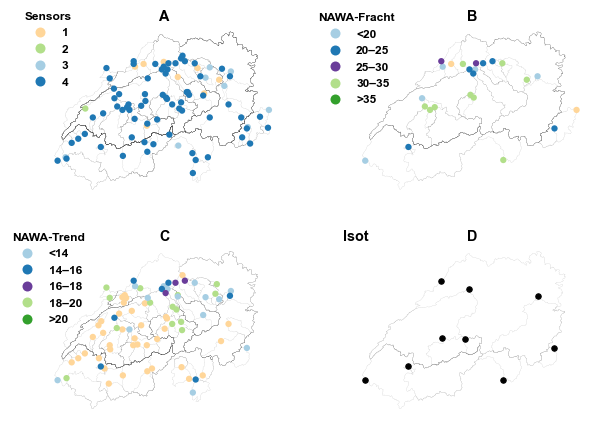

In [ ]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows}
                        )
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]
text2_subplots = ["Sensors [-]", "24 stations", "76 stations", "9 stations"]

for i, variable in enumerate(variable_list):

    if variable == "count_bafu":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_bafu_df.index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_naduf":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_datasets_df[~counts_datasets_df.count_naduf.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_nawa":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_datasets_df[~counts_datasets_df.count_nawa.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "count_isot":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[counts_datasets_df[~counts_datasets_df.count_isot.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    
    if variable == "count_isot":
        axs[i].scatter(counts_datasets_df[counts_datasets_df.count_isot.notna()]['lon'], counts_datasets_df[counts_datasets_df.count_isot.notna()]['lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=30, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        #ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("Isot", loc="left", fontweight="bold")
    

    else:
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)
        #legend_title = color_mapping_list[variable][0]
            
    
        #axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    



labels = ['1', '2', '3', '4']
colors = ['#FFD699', '#b2df8a', '#a6cee3', '#1f78b4']

legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
            markerfacecolor=color, markersize=10, markeredgecolor='none')
        for label, color in zip(labels, colors)
    ]

axs[0].legend(handles=legend_elements, title='Sensors',
        loc='lower center', bbox_to_anchor=(0.05, 0.6), frameon=False, ncol=1)
    
axs[0].set_title("A", loc="right", fontweight="bold")

labels = ['<20', '20–25', '25–30', '30–35', '>35']
colors = ['#a6cee3', '#1f78b4', '#6a3d9a', '#b2df8a', '#33a02c']

legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
            markerfacecolor=color, markersize=10, markeredgecolor='none')
        for label, color in zip(labels, colors)
    ]

axs[1].legend(handles=legend_elements, title='NAWA-Fracht',
        loc='lower center', bbox_to_anchor=(0.05, 0.5), frameon=False, ncol=1)


axs[1].set_title("B", loc="right", fontweight="bold")

labels = ['<14', '14–16', '16–18', '18–20', '>20']
colors = ['#a6cee3', '#1f78b4', '#6a3d9a', '#b2df8a', '#33a02c']

legend_elements = [
        Line2D([0], [0], marker='o', color='w', label=label,
            markerfacecolor=color, markersize=10, markeredgecolor='none')
        for label, color in zip(labels, colors)
    ]

axs[2].legend(handles=legend_elements, title='NAWA-Trend',
        loc='lower center', bbox_to_anchor=(0.05, 0.5), frameon=False, ncol=1)

axs[2].set_title("C", loc="right", fontweight="bold")

axs[3].set_title("D", loc="right", fontweight="bold")

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig1_4datasources.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

## Figure 2

In [106]:
# Create GeoDataFrame, specifying the geometry column with Point objects (lon, lat)
network_camels_ch_chem_gdf = gpd.GeoDataFrame(network_camels_ch_chem, geometry=gpd.points_from_xy(network_camels_ch_chem['gauge_lon'], network_camels_ch_chem['gauge_lat']), crs="EPSG:21781")  # Swiss CH1903/LV03 CRS

# Convert to WGS84 (EPSG:4326)
network_camels_ch_chem_gdf = network_camels_ch_chem_gdf.to_crs("EPSG:4326")

network_camels_ch_chem_gdf["x_coord"] = network_camels_ch_chem_gdf.geometry.x
network_camels_ch_chem_gdf["y_coord"] = network_camels_ch_chem_gdf.geometry.y

In [107]:
import ee
ee.Authenticate()

True

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


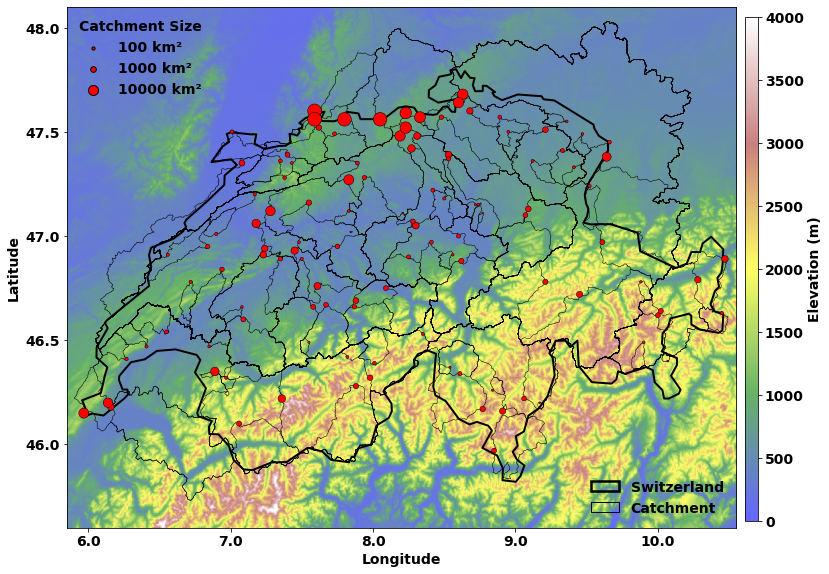

In [108]:
import ee
import geemap
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Initialize Earth Engine
ee.Initialize()

# Load the DEM dataset (SRTM 30m)
dem = ee.Image("USGS/SRTMGL1_003")

# Define a bounding box for Switzerland
switzerland_bbox = ee.Geometry.Rectangle([5.9559, 45.8179, 12, 48.8085])

# Define visualization parameters (color palette for topography)
topo_viz = {
    'min': 0,
    'max': 4000,  # Adjust max elevation
    'palette': ['blue', 'green', 'yellow', 'brown', 'white']  # Elevation color scale
}

# Generate a thumbnail image URL for Matplotlib
thumb_url = dem.visualize(**topo_viz).getThumbURL({
    'region': switzerland_bbox,
    'dimensions': '1024x1024',  # Adjust resolution as needed
    'format': 'png'
})

# Load Switzerland shapefile (if available)
# gdf = gpd.read_file("path/to/switzerland_shapefile.shp")  # Adjust path

# Set font properties
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

# Create figure and axis
fig, axs = plt.subplots(figsize=(12, 10))

# Set background color
axs.set_facecolor('white')

# Plot the DEM **directly from the URL** using `imshow()`
img = plt.imread(thumb_url)
axs.imshow(img, extent=[5.8, 10.6, 45.6, 48.1], alpha=0.6)  # Ensure correct alignment

# Overlay shapefile (if available)
#gdf.plot(ax=axs, facecolor='whitesmoke', edgecolor='black', linewidth=0.5, alpha=0.7)
ch_shapefile.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=2)

# Overlay river network
#river_ch.plot(ax=axs, linewidth=0.75, color="blue")



# Set axis limits
axs.set_xlim(5.85, 10.55)
axs.set_ylim(45.6, 48.1)

# Aspect ratio
axs.set_aspect('equal')

# Customize x and y-axis ticks
axs.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_locator(mticker.MultipleLocator(0.5))

# Add labels
axs.set_xlabel("Longitude")
axs.set_ylabel("Latitude")

# Add legend
axs.legend(loc='lower right', frameon=False)


# Define a custom colormap matching the DEM visualization
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import numpy as np

# Define a custom colormap based on the DEM visualization palette
cmap = mcolors.LinearSegmentedColormap.from_list("topo_cmap", topo_viz['palette'])

# Convert the colormap to an RGBA version
cmap_alpha = cmap(np.linspace(0, 1, 256))  # Get 256 discrete colors
cmap_alpha[:, -1] = 0.6  # Modify the alpha channel (last column)

# Create a new colormap with transparency
cmap = mcolors.ListedColormap(cmap_alpha)

norm = mcolors.Normalize(vmin=topo_viz['min'], vmax=topo_viz['max'])

# Create an axes for the colorbar
cbar_ax = fig.add_axes([0.91, 0.15, 0.015, 0.7])  # [left, bottom, width, height]
from matplotlib.cm import ScalarMappable

cbar = fig.colorbar(ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax)

# Set colorbar label
cbar.set_label("Elevation (m)")

CAMELS_CH_Chem_catchments.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=0.5,  alpha=1)


# Compute sizes for scatter plot based on catchment area
size_factor = 1 # Adjust scaling factor as needed
catchment_areas = network_camels_ch_chem_gdf['area']  # Replace with actual column name
circle_sizes = size_factor * np.sqrt(catchment_areas)  # Use sqrt to scale more naturally

# Plot the gauges with circle size based on catchment area
sc = axs.scatter(
    network_camels_ch_chem_gdf['gauge_lon'], 
    network_camels_ch_chem_gdf['gauge_lat'], 
    color='red', edgecolor='black', linewidth=0.5,
    marker='o', s=circle_sizes, label="Streamflow gauges"
)

# Ensure aspect ratio is maintained
#axs.set_aspect('equal')

# Legend for catchment sizes
legend_sizes = [100, 1000, 10000]  # Example catchment areas for legend
legend_labels = [f"{size} km²" for size in legend_sizes]
legend_circles = [plt.scatter([], [], s=size_factor * np.sqrt(size), color='red', edgecolor='black') for size in legend_sizes]

# Existing legend for circle sizes
legend1 = axs.legend(
    legend_circles, legend_labels, loc='upper left', frameon=False, title="Catchment Size"
)

# Create rectangle patches for the legend
switzerland_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2.5, label='Switzerland')
catchment_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=1, label='Catchment')

# Add the rectangle patches as a second legend
axs.add_artist(legend1)  # Keep the first legend

axs.legend(
    handles=[switzerland_patch, catchment_patch],
    loc='lower right', frameon=False
)

plt.savefig('results/catchment_agregated_data.png', dpi=300)  # Replace 'figure.png' with your desired filename and format

plt.show()

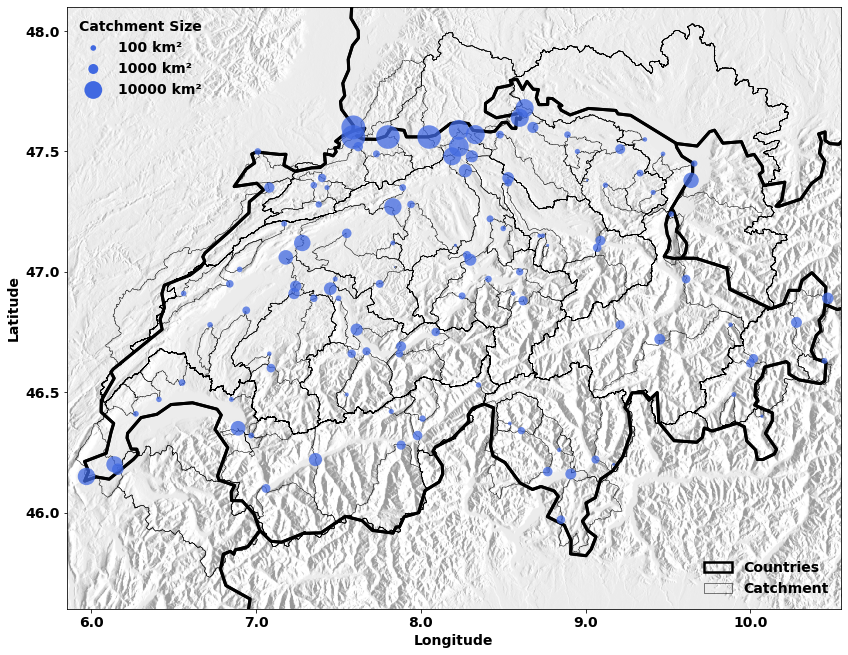

In [143]:
import ee 
import geemap
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import numpy as np
import requests
from io import BytesIO

# Initialize Earth Engine
ee.Initialize()

# Load SRTM DEM data and compute hillshade
dem = ee.Image("USGS/SRTMGL1_003")
hillshade = ee.Terrain.hillshade(dem)

# Define bounding box (Switzerland)
switzerland_bbox = ee.Geometry.Rectangle([5.8, 45.6, 10.6, 48.1])

# Generate soft hillshade (lighter shadows, less contrast)
hillshade_thumb_url = hillshade.getThumbURL({
    'region': switzerland_bbox,
    'dimensions': '1024x1024',
    'min': 150,  # higher min value makes image lighter
    'max': 255,
    'format': 'png'
})

# Load image from URL
response = requests.get(hillshade_thumb_url)
img = plt.imread(BytesIO(response.content))

# Create figure and axis
fig, axs = plt.subplots(figsize=(12, 10))

# Plot softened hillshade background
axs.imshow(img, extent=[5.8, 10.6, 45.6, 48.1], cmap='Greys', alpha=0.4)

# Plot catchment boundaries
CAMELS_CH_Chem_catchments.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=0.5, alpha=1)

countries.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=3)

# Plot Switzerland boundary
ch_shapefile.plot(ax=axs, facecolor='none', edgecolor='none', linewidth=2)


# Scatter plot: gauges sized by catchment area
size_factor = 3  
catchment_areas = network_camels_ch_chem_gdf['area']  
circle_sizes = size_factor * np.sqrt(catchment_areas)


axs.scatter(
    network_camels_ch_chem_gdf['gauge_lon'], 
    network_camels_ch_chem_gdf['gauge_lat'], 
    color='royalblue', edgecolor='none', linewidth=0.5,
    marker='o', s=circle_sizes, label="Streamflow gauges", alpha=0.75
)

# Axis limits
axs.set_xlim(5.85, 10.55)
axs.set_ylim(45.6, 48.1)

# Customize x and y-axis ticks
axs.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
axs.yaxis.set_major_locator(mticker.MultipleLocator(0.5))

# Labels
axs.set_xlabel("Longitude", fontsize=14, weight='bold')
axs.set_ylabel("Latitude", fontsize=14, weight='bold')

# Legend for catchment size circles
legend_sizes = [1000, 10000, 100000]  # example areas
legend_names = [100, 1000, 10000]
legend_labels = [f"{size} km²" for size in legend_names]
legend_circles = [plt.scatter([], [], s=np.sqrt(size), color='royalblue', edgecolor='none') for size in legend_sizes]

legend1 = axs.legend(
    legend_circles, legend_labels, loc='upper left', frameon=False, title="Catchment Size"
)

# Add rectangle legend for Switzerland and catchments
switzerland_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=2.5, label='Countries')
catchment_patch = mpatches.Patch(facecolor='none', edgecolor='black', linewidth=0.5, label='Catchment')

axs.add_artist(legend1)  # Keep first legend
axs.legend(
    handles=[switzerland_patch, catchment_patch],
    loc='lower right', frameon=False
)

# Adjust layout and save
plt.tight_layout()
plt.savefig('results/figs/catchment_hillshade_only.png', dpi=300)

# Display plot
plt.show()

## Correlations

In [ ]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_fracht"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 2  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    try:
        row["ec20lab_qmean"] = df.corr(method="spearman")["ec20_lab"]["q_mean_online"]
    except: 
        row["ec20lab_qmean"] = np.nan
    try:
        row["ec20lab_Cl"] = df.corr(method="spearman")["ec20_lab"]["Cl"]
    except: 
        row["ec20lab_Cl"] = np.nan

    try:
        row["doc_pHlab"] = df.corr(method="spearman")["doc"]["pH_lab"]
    except:
        row["doc_pHlab"] = np.nan

    #try:
    #    row["ec20lab_Ca"] = df.corr(method="spearman")["ec20_lab"]["Ca"]
    #except:
    #    row["ec20lab_Ca"] = np.nan

    try:
        row["ec25_online_Ca"] = df.corr(method="spearman")["ec25_online"]["Ca"]
    except:
        row["ec25_online_Ca"] = np.nan
    
    try:
        row["ec25_online_Cl"] = df.corr(method="spearman")["ec25_online"]["Cl"]
    except:
        row["ec25_online_Cl"] = np.nan

    try:
        row["alk_pH_lab"] = df.corr(method="spearman")["alk"]["pH_lab"]
    except:
        row["alk_pH_lab"] = np.nan
    
    try:
        row["NO3_N_ec20_lab"] = df.corr(method="spearman")["NO3_N"]["ec20_lab"]
    except:
        row["NO3_N_ec20_lab"] = np.nan

    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_df = pd.DataFrame(data).set_index('camels_id')
mean_naduf_df

100%|██████████| 24/24 [00:05<00:00,  4.11it/s]


,ec20lab_qmean,ec20lab_Cl,doc_pHlab,ec25_online_Ca,ec25_online_Cl,alk_pH_lab,NO3_N_ec20_lab
camels_id,,,,,,,
2009,-0.806372,0.824856,0.122699,0.935519,0.852676,0.116772,0.850621
2016,-0.409356,0.880773,0.001689,0.879006,0.869721,0.080938,0.839492
2018,-0.603893,0.786124,-0.271006,0.911289,0.808155,0.049636,0.765142
2044,-0.512742,0.761412,-0.119479,0.814056,0.731279,0.202812,0.809732
2067,-0.907107,0.672617,0.028608,NaN,NaN,0.377896,0.538269
2068,-0.927704,0.624111,-0.089602,0.950837,0.704828,0.103764,0.537536
2085,-0.617080,0.892432,0.115697,0.964745,0.894505,0.144770,0.928427
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,-0.316912,0.519384,0.345828,NaN,NaN,0.323273,0.479982


In [24]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_trend"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin')
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, start_column_index:]
    
    # Here we take out the > or < before converting to a numeric value:
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["ec25_lab", "q_mean_online"]].dropna()
    if len(valid_data) >= 2:
        row["ec25lab_qmean"] = filtered_df.corr(method="spearman")["ec25_lab"]["q_mean_online"]
    else:
        row["ec25lab_qmean"] = np.nan  # Assign NaN if there are fewer than 365 data points
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["ec25_lab", "Cl"]].dropna()
    if len(valid_data) >= 2:
        row["ec25lab_Cl"] = filtered_df.corr(method="spearman")["ec25_lab"]["Cl"]
    else:
        row["ec25lab_Cl"] = np.nan  # Assign NaN if there are fewer than 365 data points

    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["ec25_lab", "NO3_N"]].dropna()
    if len(valid_data) >= 2:
        row["ec25lab_NO3_N"] = filtered_df.corr(method="spearman")["NO3_N"]["ec25_lab"]
    else:
        row["ec25lab_NO3_N"] = np.nan  # Assign NaN if there are fewer than 365 data points



    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_df = pd.DataFrame(data).set_index('camels_id')
mean_nawa_df

100%|██████████| 76/76 [00:02<00:00, 35.09it/s]


,ec25lab_qmean,ec25lab_Cl,ec25lab_NO3_N
camels_id,,,
2009,-0.829064,0.890144,0.937474
2011,-0.786270,0.799816,0.710866
2016,-0.241788,0.873495,0.922982
2018,-0.362544,0.633479,0.659080
2019,-0.747692,0.875911,0.910602
...,...,...,...
2493,-0.171018,0.660575,0.746614
2610,0.107303,-0.010818,0.074905
2613,-0.392948,0.783752,0.848081


In [63]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file to gather data and align columns
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file, encoding='latin', index_col=0)
    df.index = pd.to_datetime(df.index)
    df = df.loc["1980":, :]
    
    # Filter out the columns starting from the specified index
    filtered_df = df.iloc[:, :]
    
    # Here we take out the > or < before converting to a numeric value:
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

    # Create a new dictionary for this row, with file_number and column counts
    row = {'camels_id': file_number}
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["temp", "o"]].dropna()
    if len(valid_data) >= 365:
        row["temp_o"] = valid_data.corr(method="spearman")["temp"]["o"]
    else:
        row["temp_o"] = np.nan  # Assign NaN if there are fewer than 365 data points
    
    # Ensure sufficient data points before computing correlation
    valid_data = filtered_df[["temp", "EC"]].dropna()
    if len(valid_data) >= 365:
        row["temp_EC"] = valid_data.corr(method="spearman")["temp"]["EC"]
    else:
        row["temp_EC"] = np.nan  # Assign NaN if there are fewer than 365 data points

    # Append the row to the data list
    data.append(row)

# Create a new DataFrame to store the counts, with the file number as the index
mean_sensors_df = pd.DataFrame(data).set_index('camels_id')
mean_sensors_df

100%|██████████| 87/87 [00:05<00:00, 16.13it/s]


,temp_o,temp_EC
camels_id,,
2009,-0.771125,-0.443708
2011,-0.764507,-0.347988
2016,-0.877658,-0.833418
2018,-0.900528,-0.797554
2019,-0.819652,-0.746502
...,...,...
2615,-0.947921,-0.905893
2617,-0.841765,-0.844254
2623,NaN,NaN


In [51]:
mean_naduf_df[mean_naduf_df.ec20lab_qmean>0]

,ec20lab_qmean,ec20lab_Cl,doc_pHlab,ec25_online_Ca,ec25_online_Cl,alk_pH_lab,NO3_N_ec20_lab
camels_id,,,,,,,
2608,0.035415,0.260457,0.144118,NaN,NaN,0.329693,0.153513


In [55]:
mean_nawa_df[mean_nawa_df.ec25lab_qmean>0]

,ec25lab_qmean,ec25lab_Cl,ec25lab_NO3_N
camels_id,,,
2029,0.025963,0.901464,0.956503
2099,0.131593,0.542035,0.799064
2102,0.082974,0.313214,0.456319
2210,0.325478,-0.055601,0.525827
2478,0.043625,0.099033,0.063335
2610,0.107303,-0.010818,0.074905
2640,0.277929,-0.005308,0.241666


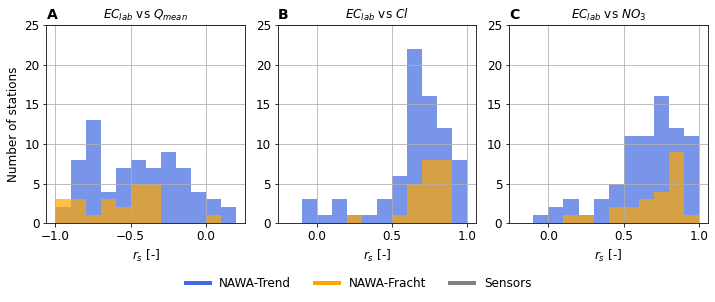

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Define dataset colors
colors = {"NADUF": "orange", "NAWA": "royalblue", "Sensors": "gray"}  # Gray as placeholder

# Left subplot: Histogram (EC_lab vs Q_mean)
bin_edges = [-1.0, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.0, 0.1, 0.2]
sns.histplot(mean_nawa_df["ec25lab_qmean"], bins=bin_edges, kde=False, ax=axs[0], color=colors["NAWA"], alpha=0.7, linewidth=0)
sns.histplot(mean_naduf_df["ec20lab_qmean"], bins=bin_edges, kde=False, ax=axs[0], color=colors["NADUF"], alpha=0.7, linewidth=0)

axs[0].set_ylabel("Number of stations", fontsize=12)
axs[0].set_xlabel(r'$r_s$ [-]', fontsize=12)
axs[0].set_title('A', loc="left", fontsize=14, fontweight="bold")

axs[0].set_title('$EC_{lab}$ vs $Q_{mean}$', loc="center", fontsize=12)
axs[0].tick_params(axis="x", labelsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(True)

# Middle subplot: Histogram (EC_lab vs Cl)
bin_edges = [-0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
sns.histplot(mean_nawa_df["ec25lab_Cl"], bins=bin_edges, kde=False, ax=axs[1], color=colors["NAWA"], alpha=0.7, linewidth=0)
sns.histplot(mean_naduf_df["ec20lab_Cl"], bins=bin_edges, kde=False, ax=axs[1], color=colors["NADUF"], alpha=0.7, linewidth=0)

axs[1].set_ylabel("")
axs[1].set_xlabel('$r_s$ [-]', fontsize=12)
axs[1].set_title('B', loc="left", fontsize=14, fontweight="bold")

axs[1].set_title('$EC_{lab}$ vs $Cl$', loc="center", fontsize=12)
axs[1].tick_params(axis="x", labelsize=12)
axs[1].tick_params(axis="y", labelsize=12)
axs[1].grid(True)

# Right subplot: Histogram (EC_lab vs NO3_N)
sns.histplot(mean_nawa_df["ec25lab_NO3_N"], bins=bin_edges, kde=False, ax=axs[2], color=colors["NAWA"], alpha=0.7, linewidth=0)
sns.histplot(mean_naduf_df["NO3_N_ec20_lab"], bins=bin_edges, kde=False, ax=axs[2], color=colors["NADUF"], alpha=0.7, linewidth=0)

axs[2].set_ylabel("")
axs[2].set_xlabel('$r_s$ [-]', fontsize=12)
axs[2].set_title('C', loc="left", fontsize=14, fontweight="bold")

axs[2].set_title('$EC_{lab}$ vs $NO_3$', loc="center", fontsize=12)
axs[2].tick_params(axis="x", labelsize=12)
axs[2].tick_params(axis="y", labelsize=12)
axs[2].grid(True)

# Set same y-limits for all subplots
for ax in axs:
    ax.set_ylim(0, 25)

# Create a legend outside the plot at the bottom
handles = [
    plt.Line2D([0], [0], color=colors["NAWA"], lw=4, label="NAWA-Trend"),
    plt.Line2D([0], [0], color=colors["NADUF"], lw=4, label="NAWA-Fracht"),
    plt.Line2D([0], [0], color=colors["Sensors"], lw=4, label="Sensors")  # Placeholder
]
fig.legend(handles=handles, loc="lower center", ncol=3, frameon=False, fontsize=12, bbox_to_anchor=(0.5, -0.05))

# Adjust layout to fit legend
fig.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space at bottom for legend
fig.savefig(r'results\figs\fig_hist_EC_q_cl_no3.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Specify the starting column index (e.g., 1 to start from the second column)
start_column_index = 1  # Adjust this based on where you want to start counting

# Initialize an empty list to store the data
data = []

file = 'results/timeseries/daily\\CAMELS_CH_Chem_daily_2018.csv'
# Extract the number from the file name (assuming it's part of the file name)
file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
# Read the CSV file
df = pd.read_csv(file, encoding='latin', index_col=0)
df.index = pd.to_datetime(df.index)

# Filter out the columns starting from the specified index
filtered_df = df.iloc[:, :]
    
# Here we take out the > or < before converting to a numeric value:
filtered_df = filtered_df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
filtered_df = filtered_df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

# There are some non-numeric things in the columns, instead of NaNs
filtered_df = filtered_df.apply(pd.to_numeric, errors='coerce')

In [46]:
mean_sensors_df.temp_o.isna().sum()

13

In [50]:
mean_sensors_df[mean_sensors_df.temp_o<-0.7].count()

temp_o     58
temp_EC    58
dtype: int64

In [49]:
mean_sensors_df[mean_sensors_df.temp_o<-0.7].count()/(87-mean_sensors_df.temp_o.isna().sum())

temp_o     0.783784
temp_EC    0.783784
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


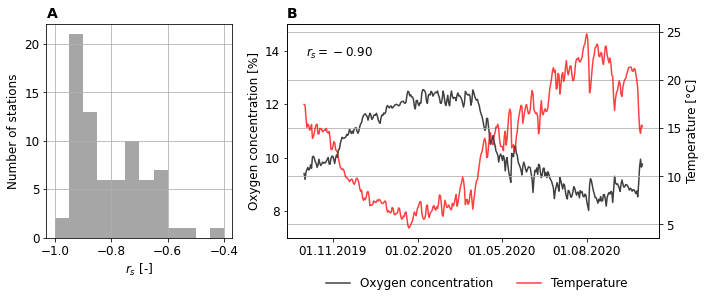

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib

# Set global font to Sans-serif
matplotlib.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size': 8})  # Set global font size

# Create figure with two subplots (left: histogram, right: time series with twin axes)
fig, axs = plt.subplots(1, 2, figsize=(10, 4), gridspec_kw={'width_ratios': [1, 2]})

# Left subplot: Histogram
bin_edges = [-1.0, -0.95, -0.9, -0.85, -0.8, -0.75, -0.7, -0.65, -0.6, -0.55, -0.5, -0.45, -0.40]
sns.histplot(mean_sensors_df["temp_o"], bins=bin_edges, kde=False, ax=axs[0], color='gray', alpha=0.7, linewidth=0)

axs[0].set_ylabel("Number of stations", fontsize=12)
axs[0].set_xlabel(r'$r_s$ [-]', fontsize=12)
axs[0].legend(frameon=False)
axs[0].set_title('A', loc="left", fontsize=14, fontweight="bold")
axs[0].tick_params(axis="x", labelsize=12)
axs[0].tick_params(axis="y", labelsize=12)
axs[0].grid(True)

# Right subplot: Time series with twin axes
ax1 = axs[1]  # Primary axis for Oxygen
ax2 = ax1.twinx()  # Secondary axis for Temperature

# Plot the first variable (oxygen concentration) on the primary y-axis
ax1.set_ylabel("Oxygen concentration [%]", fontsize=12)
temp_line, = ax1.plot(filtered_df.loc["2019-10-01":"2020-09-30"].index, filtered_df.loc["2019-10-01":"2020-09-30", "o"], color="k", label="Oxygen concentration", alpha=0.75)
ax1.tick_params(axis="y", labelsize=12)
ax1.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks

# Plot the second variable (temperature) on the secondary y-axis
ax2.set_ylabel("Temperature [°C]", fontsize=12)
oxygen_line, = ax2.plot(filtered_df.loc["2019-10-01":"2020-09-30"].index, filtered_df.loc["2019-10-01":"2020-09-30", "temp"], color="red", label="Temperature", alpha=0.75)
ax2.tick_params(axis="y", labelsize=12)
ax2.yaxis.set_major_locator(plt.MaxNLocator(5))  # Limit to 5 ticks
ax1.tick_params(axis="x", labelsize=12)

# Set y-axis limit
ax1.set_ylim(7, 15)

# Add title
axs[1].set_title('B', loc="left", fontsize=14, fontweight="bold")

# Format x-axis labels for subplot 2
date_format = mdates.DateFormatter('%d.%m.%Y')
ax1.xaxis.set_major_formatter(date_format)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Add text annotation for r_s = 0.90
axs[1].text(0.05, 0.9, r'$r_s = -0.90$', transform=axs[1].transAxes, fontsize=12, verticalalignment='top')

# Add a combined legend at the bottom center
fig.legend(handles=[temp_line, oxygen_line], loc="lower center", bbox_to_anchor=(0.68, -0.05), fontsize=12, frameon=False, ncol=2)

# Adjust layout and show plots
fig.tight_layout()
plt.grid(True)

fig.savefig(r'results\figs\fig_hist_plot_temp_o.png', dpi=300, bbox_inches='tight')


plt.show()

## Now we can process some means

In [89]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))


    # Count the number of non-null values in each column
    temp_mean = df['temp'].mean()
    ec_mean = df['EC'].mean()
    o_mean = df['o'].mean()
    ph_mean = df['ph'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_bafu_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean', 'ph_mean', 'EC_mean', 'o_mean']).set_index('camels_id')

mean_bafu_daily_df

100%|██████████| 87/87 [00:18<00:00,  4.78it/s]


,temp_mean,ph_mean,EC_mean,o_mean
camels_id,,,,
2009,7.297287,8.076862,289.301151,11.389236
2011,6.982739,8.076862,289.301151,11.389236
2016,11.914831,8.021953,375.411061,10.348721
2018,11.754490,8.044200,260.155044,10.383508
2019,5.951339,8.044200,260.155044,10.383508
...,...,...,...,...
2615,12.578869,8.024895,359.210641,10.586010
2617,5.731784,8.024895,359.210641,10.586010
2623,3.792242,7.867338,297.952191,9.693690


In [91]:
mean_bafu_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean
temp_mean,1.000000,0.012079,-0.009242,0.034931
ph_mean,0.012079,1.000000,0.317189,0.267072
EC_mean,-0.009242,0.317189,1.000000,-0.433422
o_mean,0.034931,0.267072,-0.433422,1.000000


In [90]:
df.columns

Index(['temp', 'ph', 'EC', 'o'], dtype='object')

In [92]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))

    # Count the number of non-null values in each column
    temp_mean = df['temp_online'].mean()
    ec_mean = df['ec20_lab'].mean()
    o_mean = df['O2C_online'].mean()
    ph_mean = df['pH_lab'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:19<00:00,  1.22it/s]


,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
camels_id,,,,
2009,7.309847,7.734457,262.178556,11.440294
2016,11.988522,8.238711,337.461352,10.406077
2018,12.005156,8.044560,238.703640,10.357727
2044,10.829776,8.326537,409.558566,10.755680
2067,5.364746,8.050961,232.331349,NaN
2068,9.134923,7.550427,237.085454,11.209862
2085,12.105036,8.040296,302.748807,10.236686
2091,NaN,NaN,NaN,NaN
2106,10.809791,8.346294,413.256103,NaN


In [93]:
mean_naduf_daily_df.corr()

,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf
temp_mean_naduf,1.000000,0.616923,0.397307,-0.448336
ph_mean_naduf,0.616923,1.000000,0.646550,-0.340761
EC_mean_naduf,0.397307,0.646550,1.000000,-0.234656
o_mean_naduf,-0.448336,-0.340761,-0.234656,1.000000


In [94]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))
    
    # Count the number of non-null values in each column
    temp_mean = df['temp_online'].mean()
    ec_mean = df['ec25_lab'].mean()
    o_mean = df['O2_lab'].mean()
    ph_mean = df['pH_online'].mean()
    
    # Store the results as a tuple (or list)
    data.append([file_number, temp_mean, ph_mean, ec_mean, o_mean])

# Create a new DataFrame to store the counts, with the file number as the index
mean_nawa_daily_df = pd.DataFrame(data, columns=['camels_id', 'temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']).set_index('camels_id')

mean_nawa_daily_df

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████| 76/76 [00:16<00:00,  4.56it/s]


,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,
2009,7.760127,8.162552,337.622414,11.424576
2011,6.948118,NaN,293.205882,11.046930
2016,12.454387,8.061395,379.857143,10.501770
2018,12.539650,8.250862,267.475000,10.458333
2019,6.365422,NaN,114.977108,11.823494
...,...,...,...,...
2493,9.505870,NaN,440.192063,NaN
2610,NaN,NaN,412.560345,10.828017
2613,13.023550,8.059933,354.028846,10.674038


In [95]:
mean_nawa_daily_df.corr()

,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
temp_mean_nawa,1.000000,0.359468,0.372695,-0.684473
ph_mean_nawa,0.359468,1.000000,0.481345,0.210796
EC_mean_nawa,0.372695,0.481345,1.000000,-0.003770
o_mean_nawa,-0.684473,0.210796,-0.003770,1.000000


In [40]:
mean_daily_df = mean_bafu_daily_df.copy()
mean_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']] = mean_naduf_daily_df[['temp_mean_naduf', 'ph_mean_naduf', 'EC_mean_naduf', 'o_mean_naduf']]
mean_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']] = mean_nawa_daily_df[['temp_mean_nawa', 'ph_mean_nawa', 'EC_mean_nawa', 'o_mean_nawa']]

mean_daily_df

,temp_mean,ph_mean,EC_mean,o_mean,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa
camels_id,,,,,,,,,,,,
2009,7.297287,8.076862,289.301151,11.389236,7.309847,7.734457,262.178556,11.440294,7.760127,8.162552,337.622414,11.424576
2011,6.982739,8.076862,289.301151,11.389236,NaN,NaN,NaN,NaN,6.948118,NaN,293.205882,11.046930
2016,11.914831,8.021953,375.411061,10.348721,11.988522,8.238711,337.461352,10.406077,12.454387,8.061395,379.857143,10.501770
2018,11.754490,8.044200,260.155044,10.383508,12.005156,8.044560,238.703640,10.357727,12.539650,8.250862,267.475000,10.458333
2019,5.951339,8.044200,260.155044,10.383508,NaN,NaN,NaN,NaN,6.365422,NaN,114.977108,11.823494
...,...,...,...,...,...,...,...,...,...,...,...,...
2615,12.578869,8.024895,359.210641,10.586010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2617,5.731784,8.024895,359.210641,10.586010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2623,3.792242,7.867338,297.952191,9.693690,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Load the world shapefile dataset provided by GeoPandas
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'sans-serif'  # Change the font family
mpl.rcParams['font.size'] = 16        # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

In [28]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_bafu_nawat_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_bafu_nawaf_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]

color_categories_Cl = [(-np.inf, 5), (5, 7.5), (7.5, 10), (10, 12.5), (12.5, np.inf)]
color_categories_alk = [(-np.inf, 2), (2, 3), (3, 4), (4, 5), (5, np.inf)]
color_categories_NO3_N = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_SO4 = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_NO2_N = [(-np.inf, 0.01), (0.01, 0.02), (0.02, 0.03), (0.03, 0.04), (0.04, np.inf)]
color_categories_NH4_N = [(-np.inf, 0.025), (0.025, 0.05), (0.05, 0.075), (0.075, 0.1), (0.1, np.inf)]

color_categories_tp = [(-np.inf, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.08), (0.08, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "bafu_nawat_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_bafu_nawat_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "bafu_nawaf_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_bafu_nawaf_dist, 0, 2, 0.5, 10, color_palette='custom'),

    "Cl":  generate_legend_and_color_mapping("Cl [mg/l]", color_categories_Cl, 0, 30, 1, 10),
    "alk":  generate_legend_and_color_mapping("Alk. [mmol/l]", color_categories_alk, 0, 350, 50, 10, color_palette='custom'),
    "NO3_N":  generate_legend_and_color_mapping("NO3 [mg/l]", color_categories_NO3_N, 0, 150, 1, 10, color_palette='custom'),
    "SO4":  generate_legend_and_color_mapping("SO4 [mg/l]", color_categories_SO4, 0, 10, 1, 10, color_palette='blues'),
    "NO2_N":  generate_legend_and_color_mapping("NO2 [mg/l]", color_categories_NO2_N, 0, 10, 1, 10, color_palette='custom'),
    "NH4_N": generate_legend_and_color_mapping("NH4 [mg/l]", color_categories_NH4_N, 0, 5, 1, 10, color_palette='custom'),
    "tp":  generate_legend_and_color_mapping("Total P [mg/l]", color_categories_tp, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}




def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=40)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Create a histogram inset axis within the subplot
    hist_ax = ax.inset_axes([0.05, 0.15, 0.15, 0.175])  # Adjust the values as needed

    # Extract the data for the histogram
    hist_data = estreams_attributes[variable].dropna()

    # Plot the histogram with manually controlled uniform bins
    counts, bins, patches = hist_ax.hist(hist_data, bins=hist_bins, color='white', edgecolor='black', alpha=0.7, linewidth=0.4)

    # Assign colors based on color_categories to the bins
    for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
        # Iterate through color categories and check if the bin falls within the category
        for low, high in color_categories:
            if low <= bin_left < high:
                patch.set_facecolor(color_mapping[f'{low}-{high}'])
                break
        # For bins beyond the last threshold, use the color for the last defined category
        if bin_left >= color_categories[-1][0]:
            patch.set_facecolor(color_mapping[f'{color_categories[-1][0]}-{np.inf}'])

    # Hide the axis spines and ticks for the inset axis
    hist_ax.spines['top'].set_visible(False)
    hist_ax.spines['right'].set_visible(False)
    hist_ax.spines['left'].set_visible(True)
    hist_ax.spines['bottom'].set_visible(True)
    hist_ax.set_facecolor('none')
    hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=12)

    # Get the x-axis limits
    x_min, x_max = hist_ax.get_xlim()

    # Compute the midpoint of the x-axis
    middle_tick = (x_min + x_max) / 2

    # Set x-ticks to show only the middle tick
    hist_ax.set_xticks([middle_tick])

    # Set the label for the middle tick
    hist_ax.set_xticklabels([f'{middle_tick:.1f}'], fontsize=8, fontweight="bold")

    hist_ax.set_ylabel("Count", fontsize=8, fontweight="bold")

    # Set custom y-axis ticks to show automatically but label only the middle one
    y_ticks = hist_ax.get_yticks()
    mid_tick = y_ticks[len(y_ticks) // 2]
    hist_ax.set_yticks([mid_tick])  # Set only the middle tick
    hist_ax.set_yticklabels([f'{mid_tick:.0f}'], fontsize=8, fontweight="bold")

    # Call the function to add a circular legend
    add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=7) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title)
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [348]:
mean_bafu_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_daily_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]

mean_naduf_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]
mean_nawa_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["y_coord", "x_coord"]]


KeyError: "None of [Index(['y_coord', 'x_coord'], dtype='object')] are in the [columns]"

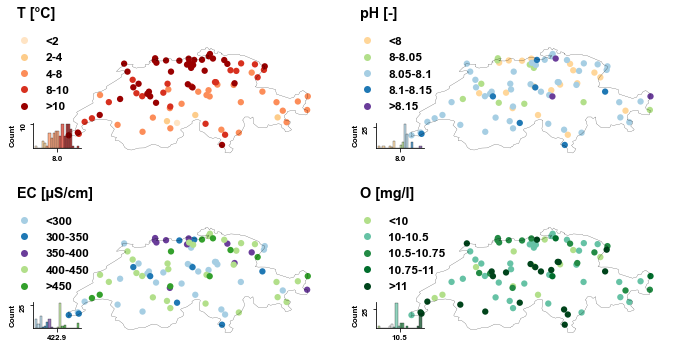

In [83]:
# List of variables
variable_list = ["temp_mean", "ph_mean", "EC_mean", "o_mean"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_bafu_daily_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [66]:
mean_naduf_df

,ec20lab_qmean,ec20lab_Cl,doc_pHlab,ec25_online_Ca,ec25_online_Cl,alk_pH_lab,NO3_N_ec20_lab
camels_id,,,,,,,
2009,-0.806372,0.824856,0.122699,0.935519,0.852676,0.116772,0.850621
2016,-0.409356,0.880773,0.001689,0.879006,0.869721,0.080938,0.839492
2018,-0.603893,0.786124,-0.271006,0.911289,0.808155,0.049636,0.765142
2044,-0.512742,0.761412,-0.119479,0.814056,0.731279,0.202812,0.809732
2067,-0.907107,0.672617,0.028608,NaN,NaN,0.377896,0.538269
2068,-0.927704,0.624111,-0.089602,0.950837,0.704828,0.103764,0.537536
2085,-0.617080,0.892432,0.115697,0.964745,0.894505,0.144770,0.928427
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,-0.316912,0.519384,0.345828,NaN,NaN,0.323273,0.479982


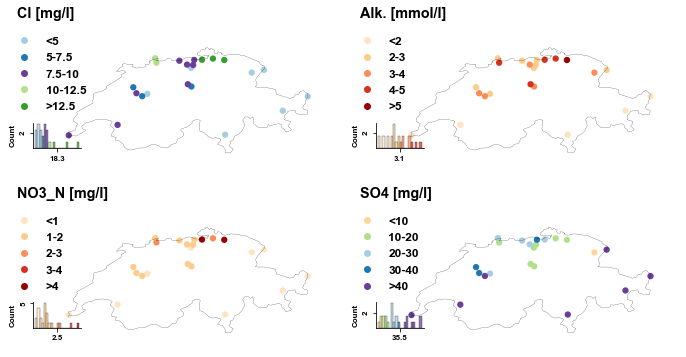

In [110]:
# List of variables
variable_list = ["Cl", "alk", "NO3_N", "SO4"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_naduf_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [347]:
mean_naduf_df

NameError: name 'mean_naduf_df' is not defined

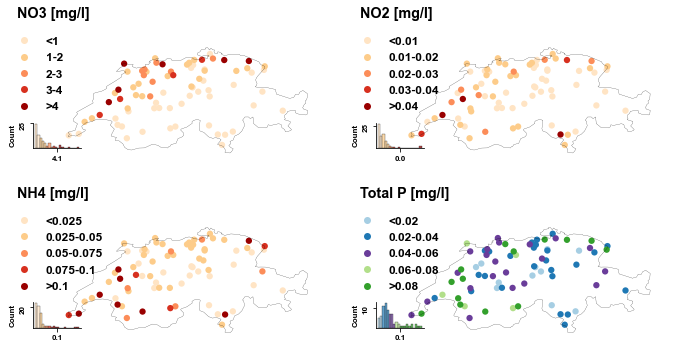

In [115]:
# List of variables
variable_list = ["NO3_N", "NO2_N", "NH4_N", "tp"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_nawa_df, color_mapping_list, gdf)
    legend_title = color_mapping_list[variable][0]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)

    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_plots_4variablesonline.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

TypeError: plot_variable_subplot() got an unexpected keyword argument 'minx'

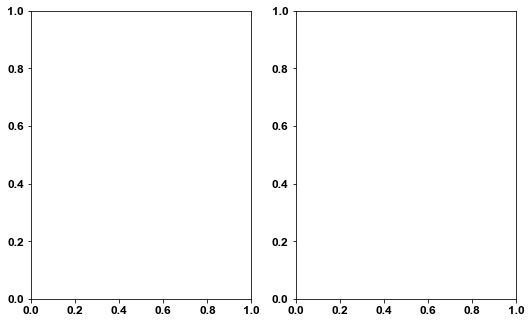

In [56]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_T_comparison_maps_naDUF.png', dpi=300, bbox_inches='tight')


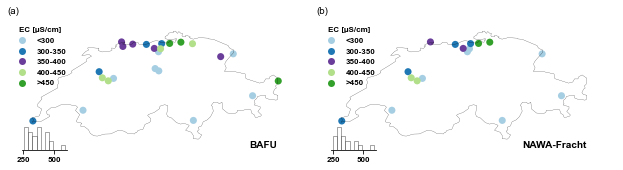

In [396]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_comparison_maps_naDUF.png', dpi=300, bbox_inches='tight')


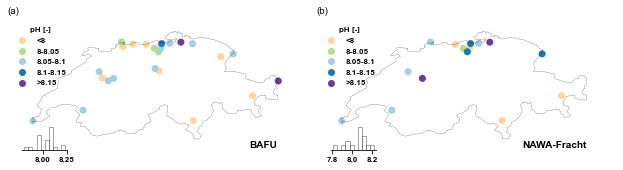

In [380]:
mean_daily_df_clip = mean_daily_df.loc[mean_naduf_daily_df.index.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_naduf"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Fracht"]

for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

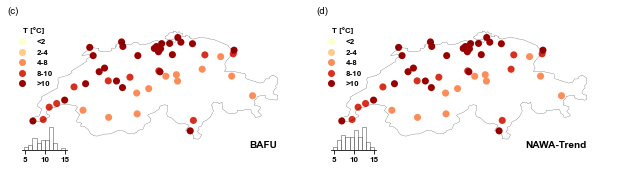

In [395]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["temp_mean", "temp_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_T_comparison_maps_nawa.png', dpi=300, bbox_inches='tight')


In [382]:
mean_daily_df[["temp_mean", "temp_mean_naduf", "temp_mean_nawa"]].corr()

,temp_mean,temp_mean_naduf,temp_mean_nawa
temp_mean,1.000000,0.989333,0.974194
temp_mean_naduf,0.989333,1.000000,0.972547
temp_mean_nawa,0.974194,0.972547,1.000000


In [383]:
mean_daily_df.corr()

,temp_mean,ph_mean,EC_mean,o_mean,temp_mean_naduf,ph_mean_naduf,EC_mean_naduf,o_mean_naduf,temp_mean_nawa,ph_mean_nawa,EC_mean_nawa,o_mean_nawa,lat,lon
temp_mean,1.000000,0.012079,-0.009242,0.034931,0.989333,0.198936,0.353995,-0.456665,0.974194,0.162681,0.447725,-0.698845,0.501924,-0.383678
ph_mean,0.012079,1.000000,0.317189,0.267072,0.028930,0.872771,0.369501,-0.007110,0.216536,0.057491,0.142727,-0.353707,-0.087271,-0.044877
EC_mean,-0.009242,0.317189,1.000000,-0.433422,0.175399,0.243596,0.930079,-0.398266,0.158783,0.279408,0.363101,-0.005201,0.119229,0.072960
o_mean,0.034931,0.267072,-0.433422,1.000000,-0.344702,0.001012,-0.325204,0.938969,-0.193989,-0.131704,-0.183367,0.126692,-0.182268,-0.104392
temp_mean_naduf,0.989333,0.028930,0.175399,-0.344702,1.000000,0.240531,0.359985,-0.448336,0.972547,0.086965,0.326856,-0.478506,0.468266,-0.573730
ph_mean_naduf,0.198936,0.872771,0.243596,0.001012,0.240531,1.000000,0.396994,0.159371,0.221945,0.755128,0.496991,-0.216398,0.374914,-0.241622
EC_mean_naduf,0.353995,0.369501,0.930079,-0.325204,0.359985,0.396994,1.000000,-0.222642,0.318323,0.485068,0.988565,-0.163345,0.410883,-0.100573
o_mean_naduf,-0.456665,-0.007110,-0.398266,0.938969,-0.448336,0.159371,-0.222642,1.000000,-0.440817,-0.232938,-0.181972,0.888451,-0.263147,0.123504
temp_mean_nawa,0.974194,0.216536,0.158783,-0.193989,0.972547,0.221945,0.318323,-0.440817,1.000000,0.116919,0.346879,-0.697375,0.396259,-0.155738
ph_mean_nawa,0.162681,0.057491,0.279408,-0.131704,0.086965,0.755128,0.485068,-0.232938,0.116919,1.000000,0.191577,-0.018017,0.175317,-0.030963


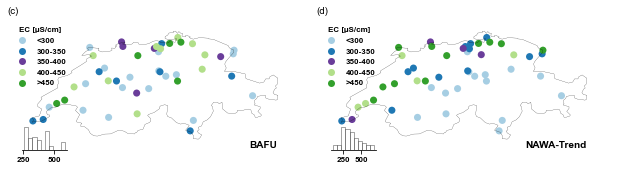

In [394]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["EC_mean", "EC_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_comparison_maps_nawa.png', dpi=300, bbox_inches='tight')


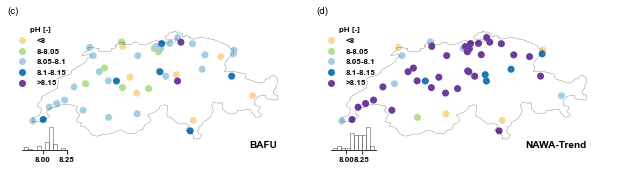

In [385]:
mean_daily_df_clip = mean_daily_df.loc[network_camels_ch_chem[(~network_camels_ch_chem.bafu_id.isna())&(~network_camels_ch_chem.nawa_id.isna())].basin_id.tolist(), :]

# List of variables
variable_list = ["ph_mean", "ph_mean_nawa"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["BAFU", "NAWA-Trend"]
    
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, mean_daily_df_clip, color_mapping_list, gdf, minx=5.5, miny=45.5, maxx=11, maxy=48)
    axs[i].set_title(f'({chr(99+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_aspect('equal')
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
        transform=axs[i].transAxes, fontsize=10)
    
# Adjust layout and remove space between subplots
plt.tight_layout()

# Save or display the plot
plt.show()

# Make a plot with the time-series

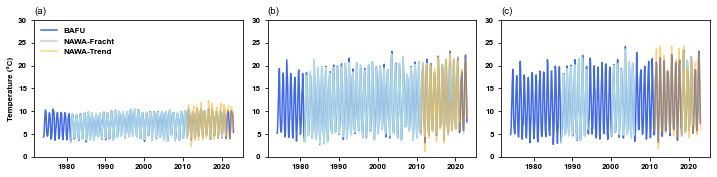

In [408]:
# List of basins to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['temp'], label='BAFU', color='royalblue')
    axes[i].plot(naduf_daily.index, naduf_daily['temp_water'], label='NAWA-Fracht', color='lightblue')
    axes[i].plot(nawa_daily.index, nawa_daily['temp_water'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(97+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('Temperature (°C)')
        axes[i].legend(frameon=False, loc="upper left")
        
    axes[i].grid(False)
    axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_T_timeseries.png', dpi=300, bbox_inches='tight')


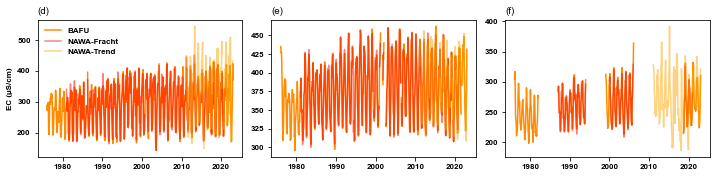

In [407]:
# List of basins to process
years = [2009, 2016, 2018]

# Base file paths (with placeholders for the year)
bafu_base_path = r"results/timeseries/daily/CAMELS_CH_Chem_daily_{}.csv"
naduf_base_path = r"results/interval_samples/NADUF/CAMELS_CH_Chem_naduf_{}.csv"
nawa_base_path = r"results/interval_samples/NAWA/CAMELS_CH_Chem_nawa_{}.csv"

# Create subplots (3 rows for each year)
fig, axes = plt.subplots(1, 3, figsize=(10, 2.5))  # 3 rows, 1 column

# Loop through each year
for i, year in enumerate(years):
    # Dynamically generate file paths by replacing the year in the base path
    bafu_file = bafu_base_path.format(year)
    naduf_file = naduf_base_path.format(year)
    nawa_file = nawa_base_path.format(year)
    
    # Read and process the bafu dataset
    bafu_df = pd.read_csv(bafu_file)
    bafu_df['date'] = pd.to_datetime(bafu_df['date'])
    bafu_df.set_index('date', inplace=True)
    bafu_daily = bafu_df.resample('M').mean()

    # Read and process the naduf dataset
    naduf_df = pd.read_csv(naduf_file)
    naduf_df['date_start'] = pd.to_datetime(naduf_df['date_start'])
    naduf_df.set_index('date_start', inplace=True)
    naduf_daily = naduf_df.resample('M').mean()

    # Read and process the nawa dataset
    nawa_df = pd.read_csv(nawa_file)
    nawa_df['date'] = pd.to_datetime(nawa_df['date'])
    nawa_df.set_index('date', inplace=True)
    nawa_daily = nawa_df.resample('M').mean()

    # Plot bafu, naduf, and nawa on the current subplot
    axes[i].plot(bafu_daily.index, bafu_daily['EC'], label='BAFU', color='darkorange')
    axes[i].plot(naduf_daily.index, naduf_daily['EC'], label='NAWA-Fracht', color='red', alpha=0.5)
    axes[i].plot(nawa_daily.index, nawa_daily['EC'], label='NAWA-Trend', color='orange', alpha=0.5)

    # Set titles and labels
    axes[i].set_title(f'({chr(100+i)})', loc="left")
    axes[i].set_xlabel('')
    if i == 0:
        axes[i].set_ylabel('EC (µS/cm)')
        axes[i].legend(frameon=False, loc="upper left")
    
    axes[i].grid(False)
    #axes[i].set_ylim(0, 30)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_EC_timeseries.png', dpi=300, bbox_inches='tight')


In [338]:
network_camels_ch_chem

,basin_id,bafu_id,naduf_id,nawa_id,isot_id,hydro_station,hydrowater_body,lon,lat,area_camels,...,lat_naduf,area_naduf,bafu_naduf_distance,nawa_station,lon_nawa,lat_nawa,area_nawa,bafu_nawa_distance,remarks.1,geometry
0,2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,5239.4,...,133280.0,5239.4,0.0,Porte du Scex,557660.0,133280.0,5239.402096,0.0,NaN,POINT (557660.000 133280.000)
1,2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,3372.4,...,NaN,NaN,NaN,Sion,593277.0,118449.0,3372.417040,0.0,NaN,POINT (593770.000 118630.000)
2,2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,11681.3,...,259360.0,11681.3,0.0,Brugg,657000.0,259360.0,11681.282882,0.0,NaN,POINT (657000.000 259360.000)
3,2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,3385.8,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,NaN,POINT (662830.000 252580.000)
4,2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,555.2,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,NaN,POINT (649930.000 177380.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,128.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (830800.000 168700.000)
112,2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,93.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (669900.000 154075.000)
113,2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,478.3,...,213630.0,478.3,0.0,Emmen-Littau,663917.0,213356.0,478.277165,0.6,NaN,POINT (663700.000 213630.000)
114,2635,2635.0,NaN,NaN,NaN,"Einsiedeln, Gross",Grossbach,700710,218125,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (700710.000 218125.000)


In [116]:
mean_naduf_df.corr()

,alk,As,Ba,Br,Cd,Ca,Cl,Cr,Cu,doc,...,tfp,th,tn,toc,tp,tss,temp_online,Zn,lat,lon
alk,1.000000,NaN,1.0,0.064030,0.052686,0.935123,0.644829,0.120768,0.699116,0.872686,...,0.780126,0.957781,0.793658,0.902414,0.550651,-0.076829,0.437707,0.466232,0.607526,-0.118092
As,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ba,1.000000,NaN,1.0,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,...,1.000000,-1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
Br,0.064030,NaN,1.0,1.000000,-0.279405,0.110019,0.085425,0.066195,0.067916,0.027269,...,0.104223,0.047505,0.031156,0.072665,0.014728,-0.003815,0.125813,0.023647,-0.061750,-0.241673
Cd,0.052686,NaN,-1.0,-0.279405,1.000000,0.013801,0.438018,0.303695,0.321841,0.242744,...,0.480046,0.181062,0.403403,0.248344,0.636060,0.151326,-0.379191,0.217440,-0.282720,0.523802
Ca,0.935123,NaN,1.0,0.110019,0.013801,1.000000,0.517299,0.203261,0.823844,0.800191,...,0.680179,0.938992,0.708273,0.835987,0.451778,-0.096819,0.363232,0.676433,0.426807,-0.256203
Cl,0.644829,NaN,1.0,0.085425,0.438018,0.517299,1.000000,0.289925,0.537858,0.574459,...,0.778340,0.705552,0.921254,0.535427,0.829605,-0.115412,0.465071,0.175681,0.415462,-0.112301
Cr,0.120768,NaN,-1.0,0.066195,0.303695,0.203261,0.289925,1.000000,0.633289,0.035847,...,0.210702,0.170666,0.237632,0.320188,0.526395,0.847666,-0.140797,0.524992,-0.364870,-0.568775
Cu,0.699116,NaN,-1.0,0.067916,0.321841,0.823844,0.537858,0.633289,1.000000,0.453293,...,0.585045,0.768812,0.726747,0.695971,0.763690,0.318403,0.093969,0.888335,0.151022,-0.308630
doc,0.872686,NaN,1.0,0.027269,0.242744,0.800191,0.574459,0.035847,0.453293,1.000000,...,0.788950,0.785605,0.676137,0.902369,0.508065,-0.226407,0.467135,0.186563,0.502329,-0.124927


# Count number of measurments (variables)

In [97]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,lat,lon,geometry,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,46.35,6.89,POINT (6.89000 46.35000),-inf-0
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,593277.0,118449.0,3372.417040,0.0,1.000005,NaN,46.22,7.36,POINT (7.36000 46.22000),-inf-0
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,47.48,8.19,POINT (8.19000 47.48000),-inf-0
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,47.42,8.27,POINT (8.27000 47.42000),5-10
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,646692.0,177000.0,555.808970,3.3,1.001097,NaN,46.75,8.09,POINT (8.09000 46.75000),2.5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45,POINT (10.45000 46.63000),NaN
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35,POINT (8.35000 46.53000),NaN
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,47.07,8.28,POINT (8.28000 47.07000),0-2.5


In [98]:
# Define the path where the CSV files are located
path = r"results/timeseries/daily"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
counts_bafu_df = pd.DataFrame(data, columns=['camels_id', 'count_bafu']).set_index('camels_id')

counts_datasets_df = pd.DataFrame(index=network_camels_ch_chem_gdf.index)

counts_datasets_df["count_bafu"] = counts_bafu_df["count_bafu"]
counts_datasets_df

  0%|          | 0/87 [00:00<?, ?it/s]

100%|██████████| 87/87 [00:06<00:00, 13.56it/s]


,count_bafu
gauge_id,
2009,4.0
2011,4.0
2016,4.0
2018,4.0
2019,4.0
...,...
2617,4.0
2623,4.0
2634,4.0


In [99]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_naduf"] = data_df["count"]

counts_datasets_df

100%|██████████| 24/24 [00:00<00:00, 33.91it/s]


,count_bafu,count_naduf
gauge_id,,
2009,4.0,35.0
2011,4.0,NaN
2016,4.0,32.0
2018,4.0,32.0
2019,4.0,NaN
...,...,...
2617,4.0,NaN
2623,4.0,NaN
2634,4.0,23.0


In [100]:
# Define the path where the CSV files are located
path = r"results/interval_samples/nawa_trend"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_nawa"] = data_df["count"]

counts_datasets_df

  0%|          | 0/76 [00:00<?, ?it/s]

100%|██████████| 76/76 [00:00<00:00, 78.52it/s]


,count_bafu,count_naduf,count_nawa
gauge_id,,,
2009,4.0,35.0,19.0
2011,4.0,NaN,14.0
2016,4.0,32.0,19.0
2018,4.0,32.0,21.0
2019,4.0,NaN,14.0
...,...,...,...
2617,4.0,NaN,NaN
2623,4.0,NaN,NaN
2634,4.0,23.0,13.0


In [101]:
# Define the path where the CSV files are located
path = r"results/interval_samples/isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)

    # Here we take out the > or < before converting to a numeric value:
    df = df.applymap(lambda x: str(x).replace('<', '') if isinstance(x, str) else x)
    df = df.applymap(lambda x: str(x).replace('>', '') if isinstance(x, str) else x)

    # There are some non-numeric things in the columns, instead of NaNs
    df = df.apply(pd.to_numeric, errors='coerce')

    count_basin = df.mean().count()
    
    # Store the results as a tuple (or list)
    data.append([file_number, count_basin])

# Create a new DataFrame to store the counts, with the file number as the index
data_df = pd.DataFrame(data, columns=['camels_id', 'count']).set_index('camels_id')# Create a new DataFrame to store the counts, with the file number as the index

counts_datasets_df["count_isot"] = data_df["count"]

counts_datasets_df

100%|██████████| 9/9 [00:00<00:00, 126.51it/s]


,count_bafu,count_naduf,count_nawa,count_isot
gauge_id,,,,
2009,4.0,35.0,19.0,2.0
2011,4.0,NaN,14.0,NaN
2016,4.0,32.0,19.0,2.0
2018,4.0,32.0,21.0,NaN
2019,4.0,NaN,14.0,2.0
...,...,...,...,...
2617,4.0,NaN,NaN,NaN
2623,4.0,NaN,NaN,NaN
2634,4.0,23.0,13.0,NaN


In [103]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,lat,lon,geometry,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,46.35,6.89,POINT (6.89000 46.35000),-inf-0
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,593277.0,118449.0,3372.417040,0.0,1.000005,NaN,46.22,7.36,POINT (7.36000 46.22000),-inf-0
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,47.48,8.19,POINT (8.19000 47.48000),-inf-0
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,47.42,8.27,POINT (8.27000 47.42000),5-10
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,646692.0,177000.0,555.808970,3.3,1.001097,NaN,46.75,8.09,POINT (8.09000 46.75000),2.5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45,POINT (10.45000 46.63000),NaN
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35,POINT (8.35000 46.53000),NaN
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,47.07,8.28,POINT (8.28000 47.07000),0-2.5


In [104]:
counts_datasets_df[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
counts_datasets_df

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon
gauge_id,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89
2011,4.0,NaN,14.0,NaN,46.22,7.36
2016,4.0,32.0,19.0,2.0,47.48,8.19
2018,4.0,32.0,21.0,NaN,47.42,8.27
2019,4.0,NaN,14.0,2.0,46.75,8.09
...,...,...,...,...,...,...
2617,4.0,NaN,NaN,NaN,46.63,10.45
2623,4.0,NaN,NaN,NaN,46.53,8.35
2634,4.0,23.0,13.0,NaN,47.07,8.28


In [105]:
river_ch = gpd.read_file('data/shps/rivers_ch_dissolved.shp')
river_ch

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,21000049,18.849608,13.158794,1.432472,0.003752,237.841082,2,70.8,0.003752,21000042,2,21000331,21000340,0,0,"MULTILINESTRING ((5.96154 46.13500, 5.96167 46..."


<AxesSubplot:>

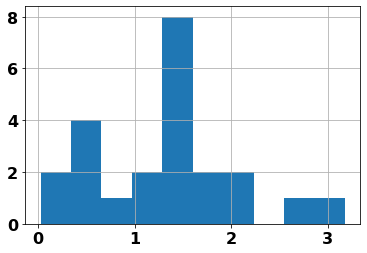

In [45]:
network_camels_ch_chem_gdf.ionic_balance.hist()

<AxesSubplot:>

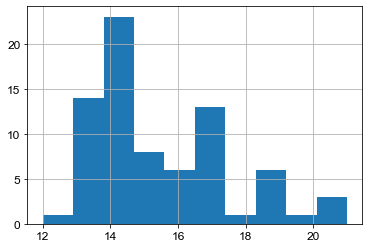

In [299]:
counts_datasets_df.count_nawa.hist()

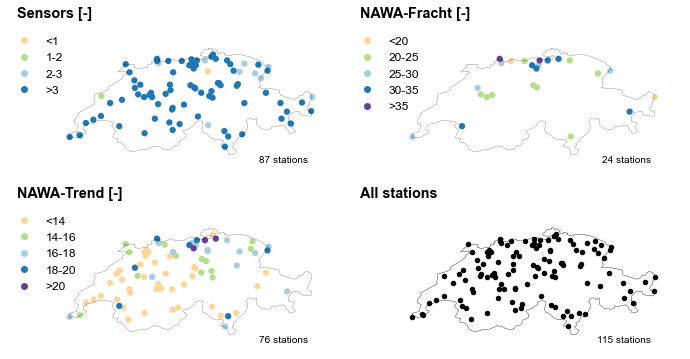

In [313]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "115 stations"]

for i, variable in enumerate(variable_list):
    if variable == "count_isot":
        axs[i].scatter(network_camels_ch_chem_gdf['gauge_lon'], network_camels_ch_chem_gdf['gauge_lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=20, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("All stations", loc="left", fontweight="bold")


    else:
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)
        legend_title = color_mapping_list[variable][0]
            
    
        axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)
        
    #river_ch.plot(ax=axs[i], linewidth=0.25)
        
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
            transform=axs[i].transAxes, fontsize=10)

    axs[i].set_aspect('equal')
    axs[i].set_aspect('equal')


# Adjust layout and remove space between subplots
plt.tight_layout()

#fig.savefig(r'results\fig_plots_v02.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon,geometry,color_category
gauge_id,,,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89,POINT (6.89000 46.35000),18-20
2016,4.0,32.0,19.0,2.0,47.48,8.19,POINT (8.19000 47.48000),18-20
2019,4.0,NaN,14.0,2.0,46.75,8.09,POINT (8.09000 46.75000),-inf-14
2030,4.0,NaN,14.0,2.0,46.76,7.61,POINT (7.61000 46.76000),-inf-14
2068,4.0,25.0,19.0,2.0,46.16,8.91,POINT (8.91000 46.16000),18-20
2174,4.0,27.0,18.0,2.0,46.15,5.97,POINT (5.97000 46.15000),16-18
2462,4.0,33.0,17.0,2.0,46.62,10.00,POINT (10.00000 46.62000),16-18
2473,4.0,27.0,19.0,2.0,47.38,9.64,POINT (9.64000 47.38000),18-20
2613,4.0,38.0,20.0,2.0,47.60,7.59,POINT (7.59000 47.60000),18-20


,count_bafu,count_naduf,count_nawa,count_isot,lat,lon,geometry,color_category,category_bafu
gauge_id,,,,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89,POINT (6.89000 46.35000),18-20,4
2016,4.0,32.0,19.0,2.0,47.48,8.19,POINT (8.19000 47.48000),18-20,4
2019,4.0,NaN,14.0,2.0,46.75,8.09,POINT (8.09000 46.75000),-inf-14,4
2030,4.0,NaN,14.0,2.0,46.76,7.61,POINT (7.61000 46.76000),-inf-14,4
2068,4.0,25.0,19.0,2.0,46.16,8.91,POINT (8.91000 46.16000),18-20,4
2174,4.0,27.0,18.0,2.0,46.15,5.97,POINT (5.97000 46.15000),16-18,4
2462,4.0,33.0,17.0,2.0,46.62,10.00,POINT (10.00000 46.62000),16-18,4
2473,4.0,27.0,19.0,2.0,47.38,9.64,POINT (9.64000 47.38000),18-20,4
2613,4.0,38.0,20.0,2.0,47.60,7.59,POINT (7.59000 47.60000),18-20,4


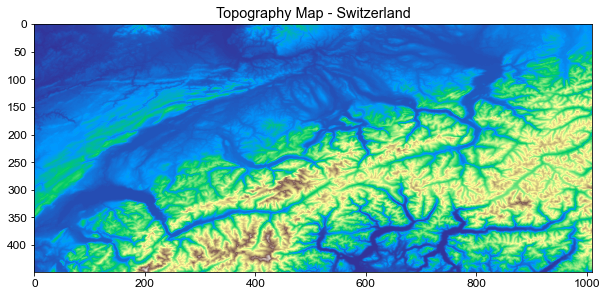

In [321]:
import ee
import geemap
import geopandas as gpd
import folium
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# Initialize Earth Engine (First-time users need to authenticate)
ee.Initialize()

# Load the DEM (Digital Elevation Model) dataset from SRTM
dem = ee.Image("USGS/SRTMGL1_003")

# Define visualization parameters for topography
topo_viz = {
    'min': 0,
    'max': 4000,  # Adjust based on your region
    'palette': ['blue', 'green', 'yellow', 'brown', 'white']  # Elevation color scheme
}

# Get the bounding box of the area (example: Switzerland)
# Define a valid bounding box for Switzerland
switzerland_bbox = ee.Geometry.Rectangle([5.9559, 45.8179, 10.4921, 47.8085])

# Convert DEM to an RGB tile layer
map_object = geemap.Map()
map_object.addLayer(dem, topo_viz, "Topography")

# Reduce the resolution to avoid large requests
scale = 500  # Increase scale to lower resolution

# Convert DEM to NumPy array with a reduced request size
dem_raster = geemap.ee_to_numpy(dem, region=switzerland_bbox, scale=scale, bands=['elevation'])

# Plot using Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Topography Map - Switzerland")

# Show topography data
show(dem_raster, ax=ax, cmap="terrain")  # Using 'terrain' colormap

## Load and plot shapefile (optional)
#shapefile = "your_shapefile.shp"
#gdf = gpd.read_file(shapefile)
#gdf.plot(ax=ax, facecolor="none", edgecolor="black")

plt.show()


In [ ]:
            f"{category[0]}-{category[1]}": ['#FFD699', '#b2df8a', '#a6cee3', '#1f78b4', '#6a3d9a'][i] for i, category in enumerate(color_categories)


In [328]:
# Function to categorize values into groups
def categorize(value):
    if value == 1:
        return '#FFD699'
    elif 1 < value <= 2:
        return '#b2df8a'
    elif 2 < value <= 3:
        return '#a6cee3'
    elif value == 4:
        return '#1f78b4'
    else:
        return 'Other'

df_bafu = counts_datasets_df[counts_datasets_df.count_bafu.notna()]

# Apply the categorization function
df_bafu['color_bafu'] = df_bafu['count_bafu'].apply(categorize)
df_bafu

,count_bafu,count_naduf,count_nawa,count_isot,lat,lon,geometry,color_category,color_bafu
gauge_id,,,,,,,,,
2009,4.0,35.0,19.0,2.0,46.35,6.89,POINT (6.89000 46.35000),18-20,#1f78b4
2011,4.0,NaN,14.0,NaN,46.22,7.36,POINT (7.36000 46.22000),-inf-14,#1f78b4
2016,4.0,32.0,19.0,2.0,47.48,8.19,POINT (8.19000 47.48000),18-20,#1f78b4
2018,4.0,32.0,21.0,NaN,47.42,8.27,POINT (8.27000 47.42000),20-inf,#1f78b4
2019,4.0,NaN,14.0,2.0,46.75,8.09,POINT (8.09000 46.75000),-inf-14,#1f78b4
...,...,...,...,...,...,...,...,...,...
2615,4.0,NaN,NaN,NaN,47.56,7.59,POINT (7.59000 47.56000),NaN,#1f78b4
2617,4.0,NaN,NaN,NaN,46.63,10.45,POINT (10.45000 46.63000),NaN,#1f78b4
2623,4.0,NaN,NaN,NaN,46.53,8.35,POINT (8.35000 46.53000),NaN,#1f78b4


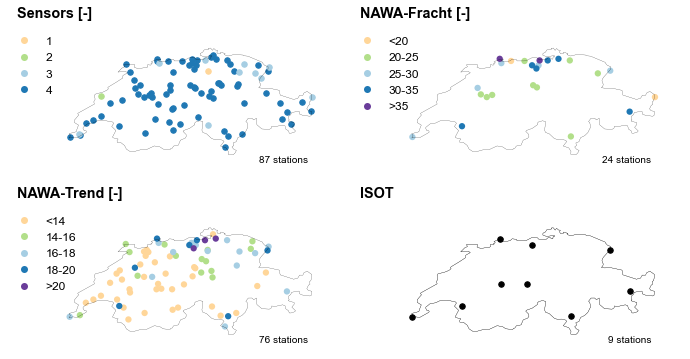

In [346]:
# List of variables
variable_list = ["count_bafu", "count_naduf", "count_nawa", "count_isot"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 5.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["87 stations", "24 stations", "76 stations", "9 stations"]

for i, variable in enumerate(variable_list):
    if variable == "count_isot":
        axs[i].scatter(counts_datasets_df[counts_datasets_df.count_isot.notna()]['lon'], counts_datasets_df[counts_datasets_df.count_isot.notna()]['lat'], color='k', edgecolor='k',linewidth=1,
            marker='o', s=30, label = "Streamflow gauges")  # Adjust color, marker, and size as needed
        ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        
        axs[i].set_title("ISOT", loc="left", fontweight="bold")
    
    elif variable == "count_bafu":
        for color in df_bafu["color_bafu"].unique():
            subset_bafu = df_bafu[df_bafu['color_bafu'] == color]
            axs[i].scatter(subset_bafu['lon'], subset_bafu['lat'], color=color, alpha=1, s=30)
            axs[i].spines['top'].set_visible(False)
            axs[i].spines['right'].set_visible(False)
            axs[i].spines['bottom'].set_visible(False)
            axs[i].spines['left'].set_visible(False)
            axs[i].set_xticks([])
            axs[i].set_yticks([])
            legend_title = color_mapping_list[variable][0]
            axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

        color_mapping = {'1': '#FFD699', '2': '#b2df8a', '3': '#a6cee3', '4': '#1f78b4'}
        legend_labels = ['1', '2', '3', '4']

        # Add circular legend
        handles = [
            Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], 
                markeredgecolor='none', markersize=7) for key in color_mapping
        ]

        # Create legend and adjust position
        legend = axs[i].legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title="")
        legend.get_frame().set_linewidth(0)  # Remove legend frame
        legend.get_frame().set_facecolor('none')  # Transparent background
        legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position



    else:
        plot_variable_subplot(axs[i], variable, counts_datasets_df, color_mapping_list, gdf)
        legend_title = color_mapping_list[variable][0]
            
    
        axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)
        
    #river_ch.plot(ax=axs[i], linewidth=0.25)
        
    # Add text in the lower-right corner
    axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
            transform=axs[i].transAxes, fontsize=10)

    axs[i].set_aspect('equal')
    axs[i].set_aspect('equal')


# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig1_4datasources.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [330]:
for color in df_bafu["color_bafu"]:
    print(color)

#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#FFD699
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#b2df8a
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#a6cee3
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4
#1f78b4


# Distance between obeservation points

In [61]:
network_camels_ch_chem.columns

Index(['sensor_id', 'nawaf_id', 'nawat_id', 'isot_id', 'gauge_name',
       'water_body_name', 'gauge_easting', 'gauge_northing', 'gauge_lon',
       'gauge_lat', 'area', 'Q', 'level', 'gauge_name_nawaf',
       'gauge_easting_nawaf', 'gauge_northing_nawaf', 'area_nawaf',
       'bafu_nawaf_dist', 'gauge_name_nawat', 'gauge_easting_nawat',
       'gauge_northing_nawat', 'area_nawat', 'bafu_nawat_dist',
       'q_nawat_corrector', 'remarks'],
      dtype='object')

In [62]:
network_camels_ch_chem[network_camels_ch_chem.bafu_nawaf_dist>0]

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_northing_nawaf,area_nawaf,bafu_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks
gauge_id,,,,,,,,,,,,,,,,,,,,,
2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,8.91,46.16,...,113500.0,1613.3,10.2,Riazzino,713670.0,113500.0,1613.268070,0.0,0.999980,Q data calculated by id_2020 *1.12
2243,2243.0,1836.0,1345.0,NaN,"Baden, Limmatpromenade",Limmat,665640,258690,8.31,47.48,...,260770.0,2412.0,7.1,Turgi,661300.0,260850.0,2412.382874,6.7,1.007805,"Data merged with 2622, Gebenstorf, Limmat"
2462,2462.0,2064.0,2064.0,NIO06,S-chanf,Inn,795800,165910,10.00,46.62,...,165910.0,616.0,3.0,S-chanf,795800.0,165910.0,615.950719,0.0,0.999920,Q data calculated by id_0403 *0.9
2467,2467.0,1831.0,NaN,NaN,Gümmenen,Saane,585100,199240,7.24,46.94,...,199240.0,1881.3,5.3,NaN,NaN,NaN,NaN,NaN,NaN,Q data from Laupen id_2215 without correction ...
2613,2613.0,2078.0,2078.0,NIO08,"Weil, Palmrainbrücke (D)",Rhein,611740,272310,7.59,47.60,...,272310.0,36404.4,7.2,"Weil, Palmrainbrücke",611740.0,272310.0,36404.416302,0.0,1.000000,"Q data from Basel, Rheinhalle id_2289 since 19..."


In [63]:
network_camels_ch_chem[network_camels_ch_chem.bafu_nawat_dist>0]

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_northing_nawaf,area_nawaf,bafu_nawaf_dist,gauge_name_nawat,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks
gauge_id,,,,,,,,,,,,,,,,,,,,,
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,252580.0,3385.8,0.0,Gebenstorf,659450.0,258850.0,3420.503458,10.0,1.010250,NaN
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,NaN,NaN,NaN,Brienzerseeeinlauf,646692.0,177000.0,555.808970,3.3,1.001097,NaN
2029,2029.0,NaN,1142.0,NaN,"Brügg, Aegerten",Aare,588220,219020,7.28,47.12,...,NaN,NaN,NaN,Nidau,584709.0,219090.0,8243.100000,3.8,0.999333,NaN
2030,2030.0,NaN,1145.0,NIO07,Thun,Aare,613230,179280,7.61,46.76,...,NaN,NaN,NaN,Thun Schadau,615219.0,177345.0,2451.536407,3.2,0.996843,NaN
2034,2034.0,NaN,1432.0,NaN,"Payerne, Caserne d'aviation",Broye,561660,187320,6.94,46.84,...,NaN,NaN,NaN,Domdidier,566187.0,191947.0,428.900220,6.6,1.031258,NaN
2044,2044.0,1823.0,1044.0,NaN,Andelfingen,Thur,693510,272500,8.68,47.60,...,272500.0,1701.6,0.0,Vor ARA Andelfingen,693086.0,272856.0,1701.627120,0.6,1.000016,NaN
2056,2056.0,NaN,4922.0,NaN,Seedorf,Reuss,690085,193210,8.62,46.88,...,NaN,NaN,NaN,"Attinghausen, Allmeinigärtli",690740.0,191720.0,818.855513,1.6,0.982784,NaN
2063,NaN,NaN,1108.0,NaN,Murgenthal,Aare,629665,235150,7.83,47.27,...,NaN,NaN,NaN,Murgenthal,629760.0,235242.0,10059.355199,0.3,0.999996,NaN
2070,2070.0,NaN,1162.0,NaN,Emmenmatt,Emme,623610,200420,7.75,46.95,...,NaN,NaN,NaN,"Emmenmatt, Mitte",623700.0,199790.0,230.974056,0.7,0.903547,Q is calculated by id_2070 minus id_2603


In [64]:
((network_camels_ch_chem.area_nawat - network_camels_ch_chem.area)/network_camels_ch_chem.area).max()

0.4199422502043134

<AxesSubplot:>

findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.


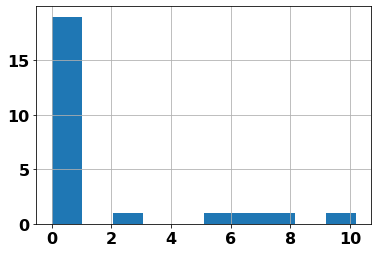

In [65]:
network_camels_ch_chem.bafu_nawaf_dist.hist()

<AxesSubplot:>

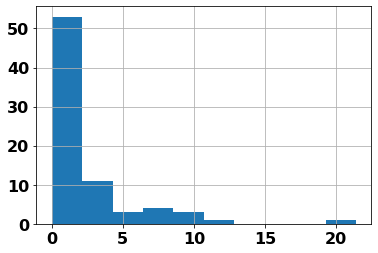

In [66]:
network_camels_ch_chem.bafu_nawat_dist.hist()

In [69]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

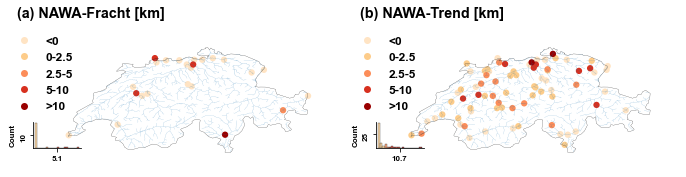

In [120]:
import math 
# List of variables
variable_list = ["bafu_nawaf_dist", "bafu_nawat_dist"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["NAWA-Fracht", "NAWA-Trend"]
legend_titles = ["(a) NAWA-Fracht [km]", "(b) NAWA-Trend [km]"]
for i, variable in enumerate(variable_list):
    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf)
    legend_title = legend_titles[i]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.2)
    axs[i].set_xlim(5.0, 11)
    axs[i].set_ylim(45.5, 48.25)
    
    river_ch.plot(ax=axs[i], linewidth=0.1)
    
    # Add text in the lower-right corner
    #axs[i].text(0.9, 0.05, text_subplots[i], verticalalignment='bottom', horizontalalignment='right',
    #    transform=axs[i].transAxes, fontsize=10)

    axs[i].set_aspect('equal')
    axs[i].set_aspect('equal')

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\fig_dist_nawaf_nawat.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

In [115]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,lat,lon,geometry,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,557660.0,133280.0,5239.402096,0.0,1.000000,NaN,46.35,6.89,POINT (6.89000 46.35000),-inf-0
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,593277.0,118449.0,3372.417040,0.0,1.000005,NaN,46.22,7.36,POINT (7.36000 46.22000),-inf-0
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,657000.0,259360.0,11681.282882,0.0,0.999999,NaN,47.48,8.19,POINT (8.19000 47.48000),-inf-0
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,659450.0,258850.0,3420.503458,10.0,1.010250,NaN,47.42,8.27,POINT (8.27000 47.42000),5-10
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,646692.0,177000.0,555.808970,3.3,1.001097,NaN,46.75,8.09,POINT (8.09000 46.75000),2.5-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45,POINT (10.45000 46.63000),NaN
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35,POINT (8.35000 46.53000),NaN
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,663917.0,213356.0,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,47.07,8.28,POINT (8.28000 47.07000),0-2.5


In [122]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawaf_dist > 5].T

gauge_id,2068,2243,2467,2613
sensor_id,2068.0,2243.0,2467.0,2613.0
nawaf_id,1840.0,1836.0,1831.0,2078.0
nawat_id,1840.0,1345.0,NaN,2078.0
isot_id,NIO05,NaN,NaN,NIO08
gauge_name,Riazzino,"Baden, Limmatpromenade",Gümmenen,"Weil, Palmrainbrücke (D)"
water_body_name,Ticino,Limmat,Saane,Rhein
gauge_easting,713670,665640,585100,611740
gauge_northing,113500,258690,199240,272310
gauge_lon,8.91,8.31,7.24,7.59
gauge_lat,46.16,47.48,46.94,47.6


In [149]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawat_dist > 5].T

gauge_id,2018,2034,2202,2205,2215,2243,2288,2374,2387,2468
sensor_id,2018.0,2034.0,NaN,2205.0,NaN,2243.0,2288.0,2374.0,NaN,NaN
nawaf_id,1835.0,NaN,NaN,NaN,NaN,1836.0,NaN,NaN,NaN,NaN
nawat_id,1339.0,1432.0,1307.0,1344.0,1912.0,1345.0,1318.0,2991.0,6055.0,3006.0
isot_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gauge_name,Mellingen,"Payerne, Caserne d'aviation",Liestal,"Untersiggenthal, Stilli",Laupen,"Baden, Limmatpromenade","Neuhausen, Flurlingerbrücke","Mogelsberg, Aachsäge",Fürstenau,"St. Gallen, Bruggen / Au"
water_body_name,Reuss,Broye,Ergolz,Aare,Saane,Limmat,Rhein,Necker,Hinterrhein,Sitter
gauge_easting,662830,561660,622270,659970,584440,665640,689145,727110,753570,742540
gauge_northing,252580,187320,259750,263180,195300,258690,281975,247290,175730,253230
gauge_lon,8.27,6.94,7.73,8.23,7.23,8.31,8.63,9.12,9.45,9.33
gauge_lat,47.42,46.84,47.49,47.52,46.91,47.48,47.68,47.36,46.72,47.41


In [87]:
network_camels_ch_chem_gdf[network_camels_ch_chem_gdf.bafu_nawaf_dist > 10]

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,gauge_easting_nawat,gauge_northing_nawat,area_nawat,bafu_nawat_dist,q_nawat_corrector,remarks,lat,lon,geometry,color_category
gauge_id,,,,,,,,,,,,,,,,,,,,,
2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,8.91,46.16,...,713670.0,113500.0,1613.26807,0.0,0.99998,Q data calculated by id_2020 *1.12,46.16,8.91,POINT (8.91000 46.16000),-inf-0


In [135]:
shapefiles_gve[shapefiles_gve.water_body=="Limmat"]

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry
23,1836,Gebenstorf,Limmat,373810.231279,nd_1836,0.0,None,0.0,None,373815.227518,...,0.307041,0.305740,0.306437,0.305883,0.308196,0.303180,0.300006,0.300360,0.301248,"POLYGON Z ((2663067.290 1262049.881 0.000, 266..."
110,0,None,Limmat,373810.231279,wq_2622,2622.0,Gebenstorf,0.0,None,373815.227518,...,0.307041,0.305740,0.306437,0.305883,0.308196,0.303180,0.300006,0.300360,0.301248,"POLYGON Z ((2663067.290 1262049.881 0.000, 266..."
155,0,None,Limmat,313677.751605,nw_1053,0.0,None,1053.0,Hönggersteg,313680.507100,...,0.310818,0.309529,0.310021,0.309522,0.312356,0.306332,0.302974,0.303615,0.304871,"POLYGON Z ((2680253.352 1251118.829 0.000, 268..."
167,0,None,Limmat,373810.231279,nw_1345,0.0,None,1345.0,Turgi,373815.227518,...,0.307041,0.305740,0.306437,0.305883,0.308196,0.303180,0.300006,0.300360,0.301248,"POLYGON Z ((2663067.290 1262049.881 0.000, 266..."


# Catchment areas

In [150]:
catchment1 = shapefiles_gve[shapefiles_gve.ID=="nw_3006"]
catchment1

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry
177,0,None,Sitter,99042.111955,nw_3006,0.0,None,3006.0,Leebrugg,99044.775553,...,0.777914,0.783966,0.783509,0.782939,0.785716,0.781568,0.78678,0.800819,0.800029,"POLYGON Z ((2744663.733 1258479.726 0.000, 274..."


In [151]:
catchment1_mghydro = shapefiles_gve[shapefiles_gve.ID=="wq_2468"]
catchment1_mghydro

,naduf_id,naduf_name,water_body,Shape_Leng,ID,gauge_id,gauge_name,nawa_id,nawa_name,Shape_Le_1,...,gve_2014_h,gve_2015_h,gve_2016_h,gve_2017_h,gve_2018_h,gve_2019_h,gve_2020_h,gve_2021_h,gve_2022_h,geometry


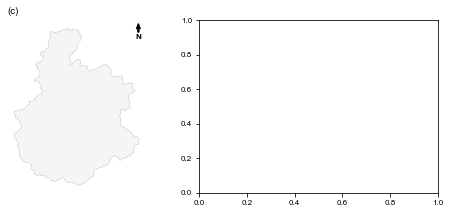

In [152]:
plt.rcParams.update({'font.size': 8})  # Change the 12 to your desired font size

# Set font properties using rcParams
mpl.rcParams['font.family'] = 'arial'  # Change the font family
mpl.rcParams['font.weight'] = 'normal'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'normal'  # Change label font weight (e.g., 'bold', 'normal')

fig, axs = plt.subplots(1, 2, figsize=(7, 3),  gridspec_kw={'width_ratios': [1, 1]})

###1:
# Set the background color to white
axs[0].set_facecolor('white')
# Plot the shapefile with white facecolor and black boundaries
catchment1_mghydro.plot(ax=axs[0], facecolor='lightsteelblue', edgecolor='black', linewidth=0.1)
catchment1.plot(ax=axs[0], facecolor='whitesmoke', edgecolor='black', linewidth=0.1)


#rivers_1.plot(ax=axs[0], linewidth=0.25)
#rivers_2.plot(ax=axs[0], linewidth=0.25)

#gauge1.plot(ax=axs[0], marker='o', color='white', markersize=5, edgecolor='black')

#minx, miny, maxx, maxy = 8.6, 46.3, 10.3, 47.3
#axs[0].set_xlim(minx, maxx) 
#axs[0].set_ylim(miny, maxy)  

axs[0].set_axis_off()  # Turn off both x-axis and y-axis

axs[0].set_aspect('equal')  # Adjust aspect ratio as needed
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Title and (a) label for the first subplot
axs[0].set_title('(c)', loc="left")

# Add a north arrow to the first subplot (axs[0])
arrow_length = 0.02
arrow_style = dict(facecolor='black', edgecolor='black', width=0.01, head_width=0.03, head_length=0.03)

# Add the arrow to the first subplot
axs[0].arrow(0.95, 0.95 - arrow_length, 0, arrow_length, **arrow_style, transform=axs[0].transAxes)


# Add 'N' text to the first subplot
axs[0].text(0.95, 0.95 - arrow_length - 0.03, 'N', ha='center', va='center', fontsize=8, fontweight='bold', color='black', transform=axs[0].transAxes)

fig.patch.set_facecolor('none')


#plt.rcParams.update({'font.size': 8})  # Change 18 to your desired font size

fig.tight_layout()

# Save or display the plot
#plt.show()
#fig.savefig('results/figure4cd.png', dpi=300,  bbox_inches='tight')

# Isotopes

100%|██████████| 9/9 [00:00<00:00, 156.28it/s]


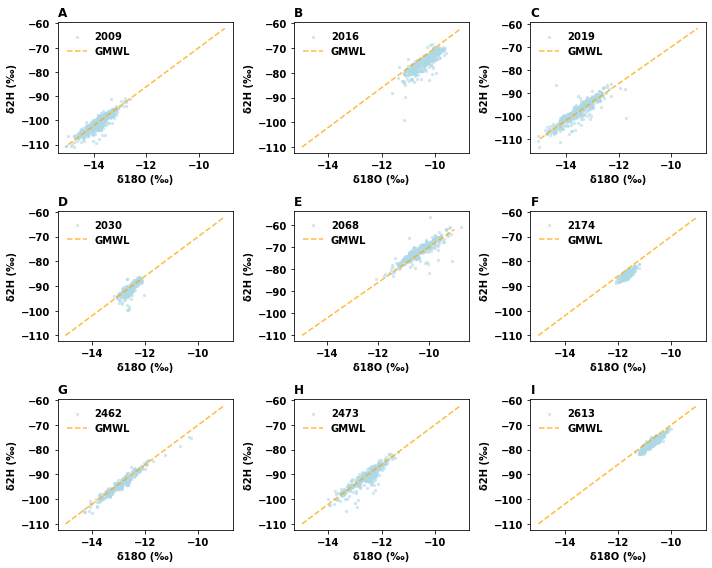

In [21]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import tqdm


# Set font properties using rcParams
mpl.rcParams['font.family'] = 'sans-serif'  # Change the font family
mpl.rcParams['font.size'] = 10         # Change the font size
mpl.rcParams['font.weight'] = 'bold'  # Change font weight (e.g., 'bold', 'normal')
mpl.rcParams['axes.labelweight'] = 'bold'  # Change label font weight (e.g., 'bold', 'normal')

# Function to extract basin_id from the filename
def get_basin_id_from_filename(filename):
    basename = os.path.basename(filename)
    # Assuming the basin_id is the last part of the file name before ".csv"
    basin_id = basename.split('_')[-1].split('.')[0]
    return basin_id


# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\isotopes"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize the number of rows and columns for subplots
num_plots = 9  # Number of subplots (e.g., 9)
nrows = 3  # 3 rows
ncols = 3  # 3 columns

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

# Flatten the axes array to easily access each subplot
axes = axes.flatten()

# Loop through each CSV file and create a subplot
for i, file in enumerate(tqdm.tqdm(csv_files[:num_plots])):  # Only process the first 9 files
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)

    # Extract the basin_id
    basin_id = get_basin_id_from_filename(file)

    # Extract the relevant columns (assuming they are named 'delta_18o' and 'delta_2h')
    delta_18o = df['delta_18o']
    delta_2h = df['delta_2h']

    # Plot δ2H vs δ18O for your data on the current axis
    axes[i].scatter(delta_18o, delta_2h, label=f'{basin_id}', color='lightblue', marker='o', s=5, alpha=0.5)

    # Plot the Global Meteoric Water Line (GMWL) on the current axis
    gmwl_d18O = range(-15, -8)  # Adjust the range based on your δ18O values
    gmwl_d2H = [8 * d18O + 10 for d18O in gmwl_d18O]
    axes[i].plot(gmwl_d18O, gmwl_d2H, label='GMWL', color='orange', linestyle='--', alpha=0.75)

    # Set labels, title, and limits for each subplot
    axes[i].set_xlabel('δ18O (‰)')
    axes[i].set_ylabel('δ2H (‰)')
    axes[i].set_title(f'{chr(97 + i).upper()}', loc='left', fontweight='bold')
    #axes[i].grid(True)
    axes[i].legend(frameon=False)
    #axes[i].set_xlim(-15, -8)
    #axes[i].set_ylim(-110, -80)

# Adjust the layout to prevent overlapping elements
plt.tight_layout()

# Show the plot
plt.show()

fig.savefig(r'results\figs\fig_tv_isotopes.png', dpi=300, bbox_inches='tight')


In [ ]:
# Defining the colour categories and mapping lists
color_categories_temp_mean = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_ph_mean = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_EC_mean = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_o_mean = [(-np.inf, 10), (10.25, 10.5), (10.5, 10.75), (10.75, 11), (11, np.inf)]
color_categories_count_naduf = [(-np.inf, 20), (20, 25), (25, 30), (30, 35), (35, np.inf)]
color_categories_count_bafu = [(-np.inf, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_count_nawa = [(-np.inf, 20), (20, 22), (22, 24), (24, 26), (26, np.inf)]
color_categories_count_isot = [(-np.inf, 1.0), (1.0, np.inf)]
color_categories_temp_mean_naduf = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_temp_mean_nawa = [(-np.inf, 2), (2, 4), (4, 8), (8, 10), (10, np.inf)]
color_categories_EC_mean_naduf = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_EC_mean_nawa = [(-np.inf, 300), (300, 350), (350, 400), (400, 450), (450, np.inf)]
color_categories_ph_mean_naduf = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_ph_mean_nawa = [(-np.inf, 8), (8.0, 8.05), (8.05, 8.1), (8.1, 8.15), (8.15, np.inf)]
color_categories_foen_nawat_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_foen_nawaf_dist = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
color_categories_ionicbalance = [(-np.inf, 0.75), (0.75, 1.5), (1.5, 2.25), (2.25, 3.0), (3.0, np.inf)]

color_categories_Cl = [(-np.inf, 5), (5, 7.5), (7.5, 10), (10, 12.5), (12.5, np.inf)]
color_categories_alk = [(-np.inf, 2), (2, 3), (3, 4), (4, 5), (5, np.inf)]
color_categories_NO3_N = [(-np.inf, 1), (1, 2), (2, 3), (3, 4), (4, np.inf)]
color_categories_SO4 = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_NO2_N = [(-np.inf, 0.01), (0.01, 0.02), (0.02, 0.03), (0.03, 0.04), (0.04, np.inf)]
color_categories_NH4_N = [(-np.inf, 0.025), (0.025, 0.05), (0.05, 0.075), (0.075, 0.1), (0.1, np.inf)]

color_categories_tp = [(-np.inf, 0.02), (0.02, 0.04), (0.04, 0.06), (0.06, 0.08), (0.08, np.inf)]
color_categories_frac_snow = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_hp_freq = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_hp_dur = [(-np.inf, 1.2), (1.2, 1.4), (1.4, 1.6), (1.6, 1.8), (1.8, np.inf)]
color_categories_lp_freq = [(-np.inf, 175), (175, 200), (200,225), (225, 250), (250, np.inf)]
color_categories_lp_dur = [(-np.inf, 4), (4, 6), (6, 8), (8, 10), (10, np.inf)]
color_categories_ele_mt_max = [(-np.inf, 1000), (1000, 2000), (2000, 3000), (3000, 4000), (4000, np.inf)]
color_categories_ele_mt_mean = [(-np.inf, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, np.inf)]
color_categories_slp_dg_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_elon_ratio = [(-np.inf, 0.5), (0.5, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, np.inf)]
color_categories_bedrk_dep = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_perc_low_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_medium_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_perc_high_perm = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_root_dep_mean = [(-np.inf, 40), (40, 60), (60, 80), (80, 100), (100, np.inf)]
color_categories_soil_tawc_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_sand_mean = [(-np.inf, 20), (20, 40), (40, 60), (60, 80), (80, np.inf)]
color_categories_soil_fra_silt_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_clay_mean = [(-np.inf, 10), (10, 20), (20, 30), (30, 40), (40, np.inf)]
color_categories_soil_fra_grav_mean = [(-np.inf, 5), (5, 10), (10, 15), (15, 20), (20, np.inf)]
color_categories_lai_mean = [(-np.inf, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, 0.25), (0.25, np.inf)]
color_categories_ndvi_mean = [(-np.inf, 0.3), (0.3, 0.4), (0.4, 0.5), (0.5, 0.6), (0.6, np.inf)]
color_categories_lulc_2006_urban = [(-np.inf, 0.05), (0.05, 0.1), (0.1, 0.15), (0.15, 0.2), (0.2, np.inf)]
color_categories_lulc_2006_NonIrriAgri = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_Agric = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_forest = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_grass = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_lulc_2006_agriculture = [(-np.inf, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, np.inf)]
color_categories_dam_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_lakes_num = [(-np.inf, 0), (0, 1), (1, 2), (2, 3), (3, np.inf)]
color_categories_area = [(-np.inf, 100), (100, 250), (250, 500), (500, 1000), (1000, np.inf)]

# Color mapping list
color_mapping_list = {
    "temp_mean":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean, 0, 10, 1, 10, color_palette='custom'),
    "ph_mean": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean, 0, 2, 0.5, 10, color_palette='blues'),
    "EC_mean": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean, -2, 5, 1, 10),
    "o_mean": generate_legend_and_color_mapping("O [mg/l]", color_categories_o_mean, 0, 10, 0.5, 10, color_palette='vegetation'),
    "count_naduf": generate_legend_and_color_mapping("NAWA-Fracht [-]", color_categories_count_naduf, 0, 1, 0.2, 10, color_palette='blues'),
    "count_bafu": generate_legend_and_color_mapping("BAFU [-]", color_categories_count_bafu, 100, 300, 50, 10, color_palette='blues'),
    "count_nawa":  generate_legend_and_color_mapping("NAWA-Trend [-]", color_categories_count_nawa, 0, 2, 0.25, 10, color_palette='blues'),
    "count_isot":  generate_legend_and_color_mapping("ISOT [-]", color_categories_count_isot, 0, 20, 2, 10, color_palette='blues'),
    "temp_mean_naduf":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_naduf, 0, 100, 1, 10, color_palette='custom'),
    "temp_mean_nawa":  generate_legend_and_color_mapping("T [°C]", color_categories_temp_mean_nawa, 0, 100, 1, 10, color_palette='custom'),
    "EC_mean_naduf": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_naduf, -2, 5, 1, 10),
    "EC_mean_nawa": generate_legend_and_color_mapping("EC [µS/cm]", color_categories_EC_mean_nawa, -2, 5, 1, 10),
    "ph_mean_nawa": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_nawa, 0, 2, 0.5, 10, color_palette='blues'),
    "ph_mean_naduf": generate_legend_and_color_mapping("pH [-]", color_categories_ph_mean_naduf, 0, 2, 0.5, 10, color_palette='blues'),
    "foen_nawat_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_foen_nawat_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "foen_nawaf_dist": generate_legend_and_color_mapping("Distance [km]", color_categories_foen_nawaf_dist, 0, 2, 0.5, 10, color_palette='custom'),
    "ionic_balance": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "ib_mean": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "25": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "50": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),
    "75": generate_legend_and_color_mapping("Ionic balance [%]", color_categories_ionicbalance, 0, 2, 0.5, 10, color_palette='custom'),

    "Cl":  generate_legend_and_color_mapping("Cl [mg/l]", color_categories_Cl, 0, 30, 1, 10),
    "alk":  generate_legend_and_color_mapping("Alk. [mmol/l]", color_categories_alk, 0, 350, 50, 10, color_palette='custom'),
    "NO3_N":  generate_legend_and_color_mapping("NO3 [mg/l]", color_categories_NO3_N, 0, 150, 1, 10, color_palette='custom'),
    "SO4":  generate_legend_and_color_mapping("SO4 [mg/l]", color_categories_SO4, 0, 10, 1, 10, color_palette='blues'),
    "NO2_N":  generate_legend_and_color_mapping("NO2 [mg/l]", color_categories_NO2_N, 0, 10, 1, 10, color_palette='custom'),
    "NH4_N": generate_legend_and_color_mapping("NH4 [mg/l]", color_categories_NH4_N, 0, 5, 1, 10, color_palette='custom'),
    "tp":  generate_legend_and_color_mapping("Total P [mg/l]", color_categories_tp, 0, 10, 1, 10, color_palette='default'),
    "frac_snow":  generate_legend_and_color_mapping("Snow frac. [-]", color_categories_frac_snow, 0, 10, 1, 10, color_palette='default'),
    "hp_freq":  generate_legend_and_color_mapping("HP freq. [days/year]", color_categories_hp_freq, 0, 10, 1, 10, color_palette='default'),
    "hp_dur": generate_legend_and_color_mapping("HP dur. [days]", color_categories_hp_dur, 0, 5, 1, 10, color_palette='default'),
    "lp_freq":  generate_legend_and_color_mapping("LP freq. [days/year]", color_categories_lp_freq, 0, 10, 0.2, 10, color_palette='default'),
    "lp_dur":  generate_legend_and_color_mapping("LP dur. [days]", color_categories_lp_dur, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_max":  generate_legend_and_color_mapping("Elev-max [m]", color_categories_ele_mt_max, 0, 10, 1, 10, color_palette='default'),
    "ele_mt_mean":  generate_legend_and_color_mapping("Mean elev. [m]", color_categories_ele_mt_mean, 0, 10, 1, 10, color_palette='default'),
    "slp_dg_mean":  generate_legend_and_color_mapping("Mean slope [d]", color_categories_slp_dg_mean, 0, 10, 1, 10, color_palette='default'),
    "elon_ratio":  generate_legend_and_color_mapping("Elon. ratio [-]", color_categories_elon_ratio, 0, 10, 1, 10, color_palette='default'),
    "bedrk_dep":  generate_legend_and_color_mapping("Bedrock depth [m]", color_categories_bedrk_dep, 0, 10, 1, 10, color_palette='default'),        
    "perc_low_perm":  generate_legend_and_color_mapping("Low perm. [%]", color_categories_perc_low_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_medium_perm":  generate_legend_and_color_mapping("Medium perm. [%]", color_categories_perc_medium_perm, 0, 10, 1, 10, color_palette='default'),
    "perc_high_perm":  generate_legend_and_color_mapping("High perm. [%]", color_categories_perc_high_perm, 0, 10, 1, 10, color_palette='default'),
    "root_dep_mean":  generate_legend_and_color_mapping("Root depth [cm]", color_categories_root_dep_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_tawc_mean":  generate_legend_and_color_mapping("TAWC [cm]", color_categories_soil_tawc_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_sand_mean":  generate_legend_and_color_mapping("Sand [%]", color_categories_soil_fra_sand_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_silt_mean":  generate_legend_and_color_mapping("Silt [%]", color_categories_soil_fra_silt_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_clay_mean":  generate_legend_and_color_mapping("Clay [%]", color_categories_soil_fra_clay_mean, 0, 10, 1, 10, color_palette='default'),
    "soil_fra_grav_mean":  generate_legend_and_color_mapping("Gravel [%]", color_categories_soil_fra_grav_mean, 0, 10, 1, 10, color_palette='default'),
    "lai_mean":  generate_legend_and_color_mapping("LAI [-]", color_categories_lai_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "ndvi_mean":  generate_legend_and_color_mapping("NDVI [-]", color_categories_ndvi_mean, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_urban":  generate_legend_and_color_mapping("Urban [-]", color_categories_lulc_2006_urban, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_NonIrriAgri":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_NonIrriAgri, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_Agric":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_Agric, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_forest":  generate_legend_and_color_mapping("Forests [-]", color_categories_lulc_2006_forest, 0, 10, 1, 10, color_palette='vegetation'),
    "lulc_2006_grass":  generate_legend_and_color_mapping("Grasslands [-]", color_categories_lulc_2006_grass, 0, 10, 1, 10, color_palette='custom'),
    "lulc_2006_agriculture":  generate_legend_and_color_mapping("Agriculture [-]", color_categories_lulc_2006_agriculture, 0, 10, 1, 10, color_palette='custom'),
    "dam_num":  generate_legend_and_color_mapping("Dams [-]", color_categories_dam_num, 0, 10, 1, 10, color_palette='default'),
    "lakes_num":  generate_legend_and_color_mapping("Lakes [-]", color_categories_lakes_num, 0, 10, 1, 10, color_palette='default'),
    "area_estreams":  generate_legend_and_color_mapping("Area [km2]", color_categories_area, 0, 10, 1, 10, color_palette='default'),
}




def plot_variable_subplot(ax, variable, estreams_attributes, color_mapping_list, gdf, total_bins=20):
    """
    Plot a variable on a subplot along with its legend and histogram, ensuring correct bin edges from color_mapping
    and equal-width bins.

    Parameters:
        ax (matplotlib Axes): Subplot axes.
        variable (str): Name of the variable.
        estreams_attributes (DataFrame): DataFrame containing attribute data.
        color_mapping_list (dict): Dictionary containing color mapping information.
        gdf (GeoDataFrame): GeoDataFrame for plotting shapefile.
        total_bins (int): Total number of bins for the histogram (ensuring equal width).

    Returns:
        None
    """
    # Extract color mapping information from the color mapping list
    legend_title = color_mapping_list[variable][0]
    color_categories = color_mapping_list[variable][1]
    legend_labels = color_mapping_list[variable][2]
    color_mapping = color_mapping_list[variable][3]

    # Determine the min and max values from the data
    data_min = estreams_attributes[variable].min()
    data_max = estreams_attributes[variable].max()

    # Create uniform bin edges
    hist_bins = np.linspace(data_min, data_max, total_bins + 1)

    # Set the background color to white
    ax.set_facecolor('white')

    # Plot the shapefile with white facecolor and black boundaries
    gdf.plot(ax=ax, facecolor='none', edgecolor='none', linewidth=0.2)
    ax.set_xlim(4.5, 8)
    ax.set_ylim(47.5, 50.5)

    # Plot the data on the map
    plot_num_measurementsmap_subplot(plotsome=estreams_attributes, xcoords="lon", ycoords="lat", column_labels=variable,
                                     color_categories=color_categories, color_mapping=color_mapping, 
                                     legend_title=legend_title, legend_labels=legend_labels, legend_loc='lower left', ax=ax, 
                                     set_map_limits=True, minx=4.5, miny=47.5, maxx=8, maxy=50.5, show_legend=False, 
                                     legend_outside=False, north_arrow=False, markersize_map=50)

    # Turn off both x-axis and y-axis
    ax.set_axis_off()

    # Create a histogram inset axis within the subplot
    #hist_ax = ax.inset_axes([0.05, 0.15, 0.15, 0.175])  # Adjust the values as needed

    # Extract the data for the histogram
    #hist_data = estreams_attributes[variable].dropna()

    # Plot the histogram with manually controlled uniform bins
    #counts, bins, patches = hist_ax.hist(hist_data, bins=hist_bins, color='white', edgecolor='black', alpha=0.7, linewidth=0.4)

    # Assign colors based on color_categories to the bins
    #for patch, bin_left, bin_right in zip(patches, bins[:-1], bins[1:]):
    #    # Iterate through color categories and check if the bin falls within the category
    #    for low, high in color_categories:
    #        if low <= bin_left < high:
    #            patch.set_facecolor(color_mapping[f'{low}-{high}'])
    #            break
    #    # For bins beyond the last threshold, use the color for the last defined category
    #    if bin_left >= color_categories[-1][0]:
    #        patch.set_facecolor(color_mapping[f'{color_categories[-1][0]}-{np.inf}'])

    ## Hide the axis spines and ticks for the inset axis
    #hist_ax.spines['top'].set_visible(False)
    #hist_ax.spines['right'].set_visible(False)
    #hist_ax.spines['left'].set_visible(True)
    #hist_ax.spines['bottom'].set_visible(True)
    #hist_ax.set_facecolor('none')
    #hist_ax.set_yticklabels(hist_ax.get_yticks(), rotation=90, fontsize=12)

    # Get the x-axis limits
    #x_min, x_max = hist_ax.get_xlim()

    ## Compute the midpoint of the x-axis
    #middle_tick = (x_min + x_max) / 2

    ## Set x-ticks to show only the middle tick
    #hist_ax.set_xticks([middle_tick])

    ## Set the label for the middle tick
    #hist_ax.set_xticklabels([f'{middle_tick:.1f}'], fontsize=8, fontweight="bold")

    #hist_ax.set_ylabel("Count", fontsize=8, fontweight="bold")

    ## Set custom y-axis ticks to show automatically but label only the middle one
    #y_ticks = hist_ax.get_yticks()
    #mid_tick = y_ticks[len(y_ticks) // 2]
    #hist_ax.set_yticks([mid_tick])  # Set only the middle tick
    #hist_ax.set_yticklabels([f'{mid_tick:.0f}'], fontsize=8, fontweight="bold")

    # Call the function to add a circular legend
    #add_circular_legend(ax, color_mapping, legend_labels, legend_title="")

    # Adjust aspect ratio
    ax.set_aspect('equal')

    # Hide spines for the main plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


def plot_num_measurementsmap_subplot(ax, plotsome: pd.DataFrame, xcoords="lon", ycoords="lat", column_labels="num_yearly_complete",
                                     crsproj='epsg:4326', showcodes=False, markersize_map=3, north_arrow=True, 
                                     set_map_limits=False, minx=0, miny=0, maxx=1, maxy=1, color_categories=None, color_mapping=None,
                                     legend_title=None, legend_labels=None, legend_loc='upper left', show_legend = True, 
                                     legend_outside=True, legend_bbox_to_anchor=(0.5, 1)):  # Add legend_outside and legend_bbox_to_anchor parameters:
    """
    Plot data on a subplot with additional options.

    Parameters:
        ax (matplotlib.axes.Axes): The subplot where the data will be plotted.
        plotsome (pd.DataFrame): The data to be plotted.
        xcoords (str): The name of the column containing x-coordinates.
        ycoords (str): The name of the column containing y-coordinates.
        column_labels (str): The name of the column containing data for coloring.
        crsproj (str): The coordinate reference system (CRS) for the data.
        showcodes (bool): Whether to show data labels.
        markersize_map (int): Size of the markers.
        north_arrow (bool): Whether to include a north arrow.
        set_map_limits (bool): Whether to set specific map limits.
        minx (float): Minimum x-axis limit.
        miny (float): Minimum y-axis limit.
        maxx (float): Maximum x-axis limit.
        maxy (float): Maximum y-axis limit.
        color_categories (list): List of color categories for data bins.
        color_mapping (dict): Mapping of color categories to colors.
        legend_title (str): Title for the legend.
        legend_labels (list): Labels for the legend items.
        legend_loc (str): Location of the legend.
        show_legend (bool): Whether to display the legend.
        legend_outside (bool): Whether to place the legend outside the plot.
        legend_bbox_to_anchor (tuple): Position of the legend (x, y).

    Returns:
        None
    """
    # Prepare the data for plotting
    crs = {'init': crsproj}
    geometry = plotsome.apply(lambda row: Point(row[xcoords], row[ycoords]), axis=1)
    geodata = gpd.GeoDataFrame(plotsome, crs=crs, geometry=geometry)
    geodatacond = geodata

    if color_categories is not None and color_mapping is not None:
        geodatacond['color_category'] = pd.cut(geodatacond[column_labels], bins=[c[0] for c in color_categories] + [np.inf], labels=[f'{c[0]}-{c[1]}' for c in color_categories])
    else:
        raise ValueError("Both color_categories and color_mapping must be provided.")

    # Plotting and legend:
    for category, group in geodatacond.groupby('color_category'):
        #group.plot(ax=ax, color=color_mapping[category], markersize=markersize_map, legend=False, label=category)
        group.plot(ax=ax, marker='o', color=color_mapping[category], markersize=markersize_map, legend=False, label=category, edgecolor='none')
    
    if showcodes == True:
        geodatacond["Code"] = geodatacond.index
        geodatacond.plot(column='Code', ax=ax)
        for x, y, label in zip(geodatacond.geometry.x, geodatacond.geometry.y, geodatacond.index):
            ax.annotate(label, xy=(x, y), xytext=(1, 1), textcoords="offset points")
        plt.rcParams.update({'font.size': 12})

    if set_map_limits == False:
        total_bounds = geodatacond.total_bounds
        minx, miny, maxx, maxy = total_bounds
        ax.set_xlim(minx, maxx)
        ax.set_ylim(miny, maxy)

    # Plot the legend
    if legend_labels is None:
        legend_labels = [f'{c[0]}-{c[1]}' for c in color_categories]
        
    if show_legend:
        if legend_outside:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc='upper left', bbox_to_anchor=legend_bbox_to_anchor,
                               bbox_transform=ax.transAxes, frameon=False)  # Use bbox_transform to position the legend
        else:
            legend = ax.legend(title=legend_title, labels=legend_labels, loc=legend_loc, frameon=False)
            
        if legend_outside:
            ax.add_artist(legend)
            
    # Plot the north arrow:
    if north_arrow == True:
        x, y, arrow_length = 0.975, 0.125, 0.1

        ax.annotate('N', xy=(x, y), xytext=(x, y - arrow_length),
                    arrowprops=dict(facecolor='black', width=5, headwidth=15),
                    ha='center', va='center', fontsize=18,
                    xycoords='axes fraction')
  
    # Set font family and size using rcParams
    mpl.rcParams['font.family'] = 'Arial'
    mpl.rcParams['font.size'] = 12  # You can adjust this value as needed
    
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=Warning)

def add_circular_legend(ax, color_mapping, legend_labels, legend_title):
    """
    Add a circular legend to the specified axes.

    Parameters:
        ax (matplotlib.axes.Axes): The axes to which the legend will be added.
        color_mapping (dict): A dictionary mapping legend labels to colors.
        legend_labels (list): List of legend labels.
        legend_title (str): Title for the legend.

    Returns:
        None
    """
    handles = [Line2D([0], [0], marker='o', color='none', markerfacecolor=color_mapping[key], markeredgecolor='none', markersize=10) for key in color_mapping]
    legend = ax.legend(handles, legend_labels, loc='upper left', bbox_to_anchor=(1, 1), title=legend_title, fontsize="large")
    legend.get_frame().set_linewidth(0)  # Remove legend frame
    legend.get_frame().set_facecolor('none')  # Remove legend background
    legend.set_bbox_to_anchor((-0.05, 0.99))  # Adjust legend position

In [101]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]
network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)

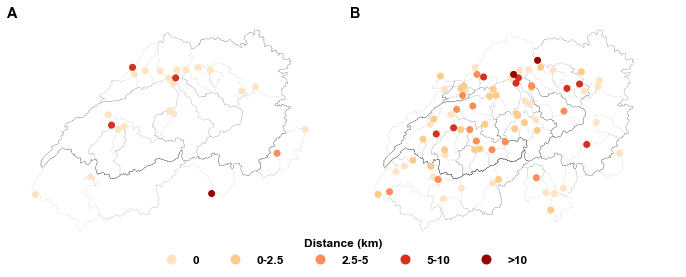

In [105]:
import math 
# List of variables
variable_list = ["foen_nawaf_dist", "foen_nawat_dist"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(9.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
axs = axs.flatten()
text_subplots = ["NAWA-Fracht", "NAWA-Trend"]
legend_titles = ["A", "B"]
for i, variable in enumerate(variable_list):

    if variable == "foen_nawaf_dist":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf.foen_nawaf_dist.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)

    elif variable == "foen_nawat_dist":

        CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf.foen_nawat_dist.isna()].index].plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)


    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf)
    legend_title = legend_titles[i]
        
    axs[i].set_title(f'{legend_title}', loc="left", fontweight="bold")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    

# Define your categories and colors
categories = [(-np.inf, 0), (0, 2.5), (2.5, 5), (5, 10), (10, np.inf)]
labels = ['0', '0-2.5', '2.5-5', '5-10', '>10']
colors = ['bisque', '#fdcc8a', '#fc8d59', '#d7301f', '#990000']

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=10, markeredgecolor='none')
    for label, color in zip(labels, colors)
]

fig.legend(handles=legend_elements, title='Distance (km)',
           loc='lower center', bbox_to_anchor=(0.5, 0.195), frameon=False, ncol=len(labels))

# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig_dist_nawaf_nawat.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

## Ionic mass balance - Nawa-Fracht

In [23]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    df = df.resample('M').apply(lambda x: x.mean(skipna=False))


    # Count the number of non-null values in each column
    Ca = df['Ca'].mean()
    Mg = df['Mg'].mean()
    Na = df['Na'].mean()
    K = df['K'].mean()
    Cl = df['Cl'].mean()
    SO4 = df['SO4'].mean()
    HCO3 = df['alk'].mean()

    
    # Store the results as a tuple (or list)
    data.append([file_number, Ca, Mg, Na, K, Cl, SO4, HCO3])

# Create a new DataFrame to store the counts, with the file number as the index
mean_naduf_daily_df = pd.DataFrame(data, columns=['camels_id', 'Ca', 'Mg', 'Na', 'K', 'Cl', "SO4", "HCO3"]).set_index('camels_id')

mean_naduf_daily_df

100%|██████████| 24/24 [00:17<00:00,  1.39it/s]


,Ca,Mg,Na,K,Cl,SO4,HCO3
camels_id,,,,,,,
2009,41.705955,5.669906,6.835386,1.569579,9.723020,54.432048,1.450499
2016,61.302897,6.936977,6.980511,1.919722,9.842702,25.891693,3.036009
2018,43.842287,4.357602,4.256920,1.360350,4.504234,14.273151,2.273987
2044,66.874641,13.228832,10.939763,2.631370,15.365532,11.769007,4.079238
2067,36.686164,8.722697,1.415595,0.613594,1.152500,52.067829,1.496118
2068,37.743857,6.100203,2.905438,1.963494,3.267387,65.840000,1.030623
2085,56.704644,5.974476,4.521972,1.381426,5.966626,31.728874,2.637166
2091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2106,87.105166,4.343956,6.971963,2.127775,10.716866,19.618997,4.135448


In [ ]:
# Convert mg/L to meq/L (for major cations and anions)
mean_naduf_daily_df['Ca_meq'] = mean_naduf_daily_df['Ca'] / 20.04
mean_naduf_daily_df['Mg_meq'] = mean_naduf_daily_df['Mg'] / 12.1525
mean_naduf_daily_df['Na_meq'] = mean_naduf_daily_df['Na'] / 22.9898
mean_naduf_daily_df['K_meq'] = mean_naduf_daily_df['K'] / 39.0983

mean_naduf_daily_df['Cl_meq'] = mean_naduf_daily_df['Cl'] / 35.453
mean_naduf_daily_df['SO4_meq'] = mean_naduf_daily_df['SO4'] / 48.03


# Important HCO3 conversion correction (assuming original data is mmol/L):
mean_naduf_daily_df['HCO3_mgL'] = mean_naduf_daily_df['HCO3'] * 61.017
mean_naduf_daily_df['HCO3_meq'] = mean_naduf_daily_df['HCO3_mgL'] / 61.017  

# Sum of cations and anions:
mean_naduf_daily_df['sum_cations_meq'] = (
    mean_naduf_daily_df[['Ca_meq', 'Mg_meq', 'Na_meq', 'K_meq']].sum(axis=1)
)

mean_naduf_daily_df['sum_anions_meq'] = (
    mean_naduf_daily_df[['Cl', 'SO4']].div([35.453, 48.03]).sum(axis=1)
    + mean_naduf_daily_df['HCO3_meq']  # Add if you have HCO3
)

# Ionic balance calculation (percentage difference):
mean_naduf_daily_df['ionic_balance_%'] = (
    (mean_naduf_daily_df['sum_cations_meq'] - mean_naduf_daily_df['sum_anions_meq']) /
    (mean_naduf_daily_df['sum_cations_meq'] + mean_naduf_daily_df['sum_anions_meq'])
) * 100



,date_start,alk,As,Ba,Br,Cd,Ca,Cl,Cr,Cu,...,Sr,SO4,tfp,th,tn,toc,tp,tss,temp_sensor,Zn
date_end,,,,,,,,,,,,,,,,,,,,,
2019-01-31,NaN,3.157900,NaN,NaN,NaN,NaN,61.142900,8.604350,NaN,NaN,...,NaN,11.142800,0.01570,1.741150,2.064600,4.234750,0.055850,62.220850,2.882250,NaN
2019-02-28,NaN,3.598450,NaN,NaN,NaN,NaN,69.394800,13.893200,NaN,NaN,...,NaN,12.702500,0.00920,1.988200,2.194650,3.196000,0.028350,14.713750,1.853000,NaN
2019-03-31,NaN,2.820550,NaN,NaN,NaN,NaN,54.429200,4.984850,NaN,NaN,...,NaN,9.162600,NaN,1.534250,1.483200,4.362500,0.028500,27.176300,4.645350,NaN
2019-04-30,NaN,2.796567,NaN,NaN,NaN,NaN,53.304767,4.172167,NaN,NaN,...,NaN,10.649733,NaN,1.510067,0.986667,3.311100,0.010800,6.169067,7.340900,NaN
2019-05-31,NaN,2.583350,NaN,NaN,NaN,NaN,48.787450,3.037050,NaN,NaN,...,NaN,7.975850,0.00630,1.371850,1.011500,4.364050,0.040550,38.197800,9.059600,NaN
2019-06-30,NaN,2.742800,NaN,NaN,NaN,NaN,51.464100,3.603200,NaN,NaN,...,NaN,8.547950,0.00765,1.454700,1.038400,4.177200,0.062700,81.884200,14.604800,NaN
2019-07-31,NaN,3.118850,NaN,NaN,NaN,NaN,58.363150,6.454000,NaN,NaN,...,NaN,12.653800,NaN,1.686050,1.230600,4.321800,0.028850,23.057150,20.990950,NaN
2019-08-31,NaN,2.721400,NaN,NaN,NaN,NaN,50.894400,3.614700,NaN,NaN,...,NaN,9.300250,0.00670,1.443000,1.271700,6.465950,0.113900,150.220900,19.129050,NaN
2019-09-30,NaN,3.143533,NaN,NaN,NaN,NaN,58.624733,4.529100,NaN,NaN,...,NaN,11.490267,0.00720,1.671800,1.362100,5.884867,0.093367,140.924167,15.469333,NaN


In [90]:
# Define the path where the CSV files are located
path = r"results\stream_water_chemistry\interval_samples\nawa_fracht"  # Replace with the actual path

# Get all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Initialize an empty list to store the data
data = []

# Loop through each CSV file
for file in tqdm.tqdm(csv_files):
    # Extract the number from the file name (assuming it's part of the file name)
    # Example: "data_123.csv" -> number is 123
    file_number = int(os.path.splitext(os.path.basename(file))[0].split('_')[4])
    
    # Read the CSV file
    df = pd.read_csv(file)
    
    df['date_end'] = pd.to_datetime(df['date_end'])
    df.set_index('date_end', inplace=True)
    df = df.apply(pd.to_numeric, errors='coerce')

    #df = df.resample('M').apply(lambda x: x.mean(skipna=False))
    df = df[['Ca', 'Mg', 'Na', 'K', 'Cl', 'SO4', 'alk']]

    df_clean = df.dropna(how='any')

    # Convert mg/L to meq/L (for major cations and anions)
    df_clean['Ca_meq'] = df_clean['Ca'] / 20.04
    df_clean['Mg_meq'] = df_clean['Mg'] / 12.1525
    df_clean['Na_meq'] = df_clean['Na'] / 22.9898
    df_clean['K_meq'] = df_clean['K'] / 39.0983

    df_clean['Cl_meq'] = df_clean['Cl'] / 35.453
    df_clean['SO4_meq'] = df_clean['SO4'] / 48.03


    # Important HCO3 conversion correction (assuming original data is mmol/L):
    df_clean['HCO3_mgL'] = df_clean['alk'] * 61.017
    df_clean['HCO3_meq'] = df_clean['HCO3_mgL'] / 61.017  

    # Sum of cations and anions:
    df_clean['sum_cations_meq'] = (
        df_clean[['Ca_meq', 'Mg_meq', 'Na_meq', 'K_meq']].sum(axis=1)
    )

    df_clean['sum_anions_meq'] = (
        df_clean[['Cl', 'SO4']].div([35.453, 48.03]).sum(axis=1)
        + df_clean['HCO3_meq']  # Add if you have HCO3
    )

    # Ionic balance calculation (percentage difference):
    df_clean['ionic_balance'] = (
        (df_clean['sum_cations_meq'] - df_clean['sum_anions_meq']) /
        (df_clean['sum_cations_meq'] + df_clean['sum_anions_meq'])
    ) * 100
    try:
        ib_mean = df_clean.ionic_balance.describe().T["mean"]
        ib_25 = df_clean.ionic_balance.describe().T["25%"]
        ib_50 = df_clean.ionic_balance.describe().T["50%"]
        ib_75 = df_clean.ionic_balance.describe().T["75%"]

    except:
        ib_mean = np.nan
        ib_25 = np.nan
        ib_50 = np.nan
        ib_75 = np.nan

    # Store the results as a tuple (or list)
    data.append([file_number, ib_mean, ib_25, ib_50, ib_75])

ionic_balance_nawaf = pd.DataFrame(data, columns=['camels_id', "ib_mean", '25', '50', '75']).set_index('camels_id')

100%|██████████| 24/24 [00:03<00:00,  6.71it/s]


In [91]:
ionic_balance_nawaf

,ib_mean,25,50,75
camels_id,,,,
2009,0.435985,-0.545902,0.359950,1.299944
2016,1.639680,0.733901,1.594390,2.505173
2018,1.205843,0.271829,1.278908,2.133413
2044,2.099322,1.391718,2.050711,2.778935
2067,0.398352,-1.059095,0.216745,1.551320
2068,1.320987,0.111855,1.115087,2.224546
2085,1.191098,0.441571,1.173093,1.783882
2091,NaN,NaN,NaN,NaN
2106,2.179472,1.479517,2.168280,2.797340


In [92]:
df

,Ca,Mg,Na,K,Cl,SO4,alk
date_end,,,,,,,
2019-01-07 10:15:00,60.5501,5.2328,4.4358,1.3673,4.8510,11.3024,3.1750
2019-01-21 10:15:00,61.7357,5.2512,8.5343,1.6797,12.3577,10.9832,3.1408
2019-02-04 10:25:00,70.8429,6.6346,10.2897,1.7182,14.0908,13.7580,3.7023
2019-02-18 10:15:00,67.9467,5.8530,9.2756,1.7552,13.6956,11.6470,3.4946
2019-03-04 09:15:00,60.4641,5.0248,4.5463,1.2511,5.8161,11.2108,3.1318
2019-03-18 10:05:00,48.3943,3.5448,3.1533,0.9531,4.1536,7.1144,2.5093
2019-04-01 11:00:00,58.8316,4.9382,4.2567,1.1550,4.8646,11.1127,3.0847
2019-04-15 10:20:00,54.8497,4.5949,4.2972,1.1573,4.7530,11.0637,2.8801
2019-04-29 10:30:00,46.2330,3.6033,2.9358,0.8475,2.8989,9.7728,2.4249


In [100]:
ionic_balance_nawaf

,ib_mean,25,50,75
camels_id,,,,
2009,0.435985,-0.545902,0.359950,1.299944
2016,1.639680,0.733901,1.594390,2.505173
2018,1.205843,0.271829,1.278908,2.133413
2044,2.099322,1.391718,2.050711,2.778935
2067,0.398352,-1.059095,0.216745,1.551320
2068,1.320987,0.111855,1.115087,2.224546
2085,1.191098,0.441571,1.173093,1.783882
2091,NaN,NaN,NaN,NaN
2106,2.179472,1.479517,2.168280,2.797340


In [94]:
len(ionic_balance_nawaf[ionic_balance_nawaf["ib_mean"] < 1.5])/23

0.6956521739130435

In [95]:
network_camels_ch_chem_gdf = network_camels_ch_chem.copy()
network_camels_ch_chem_gdf.set_index("gauge_id", inplace=True)
network_camels_ch_chem_gdf[["ib_mean",	"25", "50", "75"]] = ionic_balance_nawaf[["ib_mean",	"25", "50", "75"]]
network_camels_ch_chem_gdf[["lat", "lon"]] = network_camels_ch_chem_gdf[["gauge_lat", "gauge_lon"]]

In [96]:
network_camels_ch_chem_gdf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body_name,gauge_easting,gauge_northing,gauge_lon,gauge_lat,...,area_nawat,foen_nawat_dist,q_nawat_corrector,remarks,ib_mean,25,50,75,lat,lon
gauge_id,,,,,,,,,,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,...,5239.402096,0.0,1.000000,NaN,0.435985,-0.545902,0.359950,1.299944,46.35,6.89
2011,2011.0,NaN,4070.0,NaN,Sion,Rhône,593770,118630,7.36,46.22,...,3372.417040,0.0,1.000005,NaN,NaN,NaN,NaN,NaN,46.22,7.36
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,...,11681.282882,0.0,0.999999,NaN,1.639680,0.733901,1.594390,2.505173,47.48,8.19
2018,2018.0,1835.0,1339.0,NaN,Mellingen,Reuss,662830,252580,8.27,47.42,...,3420.503458,10.0,1.010250,NaN,1.205843,0.271829,1.278908,2.133413,47.42,8.27
2019,2019.0,NaN,1852.0,NIO01,Brienzwiler,Aare,649930,177380,8.09,46.75,...,555.808970,3.3,1.001097,NaN,NaN,NaN,NaN,NaN,46.75,8.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2617.0,NaN,NaN,NaN,Müstair,Rom,830800,168700,10.45,46.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.63,10.45
2623,2623.0,NaN,NaN,NaN,Oberwald,Rhone,669900,154075,8.35,46.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.53,8.35
2634,2634.0,6169.0,1181.0,NaN,Emmen,Kleine Emme,663700,213630,8.28,47.07,...,478.277165,0.6,1.000188,station was moved from Littau to Emmen in 2013...,0.909065,0.389850,0.941559,1.324744,47.07,8.28


In [85]:
df

,Ca,Mg,Na,K,Cl,SO4,alk
date_end,,,,,,,
2019-01-31,61.142900,5.242000,6.48505,1.523500,8.604350,11.142800,3.157900
2019-02-28,69.394800,6.243800,9.78265,1.736700,13.893200,12.702500,3.598450
2019-03-31,54.429200,4.284800,3.84980,1.102100,4.984850,9.162600,2.820550
2019-04-30,53.304767,4.378800,3.82990,1.053267,4.172167,10.649733,2.796567
2019-05-31,48.787450,3.758600,2.88680,1.078450,3.037050,7.975850,2.583350
2019-06-30,51.464100,4.148850,3.18845,1.159000,3.603200,8.547950,2.742800
2019-07-31,58.363150,5.588750,5.58985,1.590550,6.454000,12.653800,3.118850
2019-08-31,50.894400,4.210750,3.73120,1.458150,3.614700,9.300250,2.721400
2019-09-30,58.624733,5.083133,4.45110,1.553967,4.529100,11.490267,3.143533


In [55]:
CAMELS_CH_Chem_catchments = CAMELS_CH_Chem_catchments.to_crs("EPSG:4326")

In [56]:
countries = countries.to_crs("EPSG:4326")

In [59]:
CAMELS_CH_Chem_catchments_nawaf= CAMELS_CH_Chem_catchments.set_index("gauge_id", inplace=False).loc[network_camels_ch_chem_gdf[~network_camels_ch_chem_gdf["50"].isna()].index]

In [61]:
CAMELS_CH_Chem_catchments_nawaf

,sensor_id,nawaf_id,nawat_id,isot_id,gauge_name,water_body,gauge_east,gauge_nort,gauge_lon,gauge_lat,area,geometry
gauge_id,,,,,,,,,,,,
2009,2009.0,1837.0,1837.0,NIO04,Porte du Scex,Rhône,557660,133280,6.89,46.35,5239.4,"POLYGON Z ((8.40869 46.65398 0.00000, 8.40983 ..."
2016,2016.0,1833.0,1833.0,NIO02,Brugg,Aare,657000,259360,8.19,47.48,11681.3,"POLYGON Z ((8.18125 47.48564 0.00000, 8.18135 ..."
2018,2018.0,1835.0,1339.0,None,Mellingen,Reuss,662830,252580,8.27,47.42,3385.8,"POLYGON Z ((8.28316 47.42399 0.00000, 8.28409 ..."
2044,2044.0,1823.0,1044.0,None,Andelfingen,Thur,693510,272500,8.68,47.60,1701.6,"POLYGON Z ((9.02856 47.65310 0.00000, 9.02858 ..."
2067,2067.0,1842.0,NaN,None,Martina,Inn,830640,197190,10.47,46.89,1937.5,"POLYGON Z ((10.31364 46.92516 0.00000, 10.3139..."
2068,2068.0,1840.0,1840.0,NIO05,Riazzino,Ticino,713670,113500,8.91,46.16,1613.3,"POLYGON Z ((8.96069 46.61845 0.00000, 8.96056 ..."
2085,2085.0,1832.0,1832.0,None,Hagneck,Aare,580680,211650,7.18,47.06,5111.9,"POLYGON Z ((7.24688 47.06459 0.00000, 7.24685 ..."
2106,2106.0,1828.0,2885.0,None,"Münchenstein, Hofmatt",Birs,613570,263080,7.62,47.52,887.3,"POLYGON Z ((7.61628 47.52337 0.00000, 7.61653 ..."
2112,2112.0,4409.0,4409.0,None,Appenzell,Sitter,749040,244220,9.41,47.33,74.4,"POLYGON Z ((9.46187 47.34317 0.00000, 9.46172 ..."


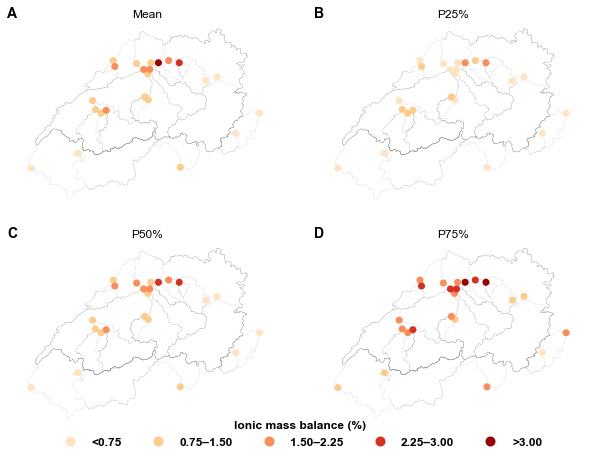

In [99]:
import math 
# List of variables
variable_list = ["ib_mean",	"25", "50", "75"]

# Create a subplot grid
num_variables = len(variable_list)
num_cols = 2
num_rows = math.ceil(num_variables / num_cols)

fig, axs = plt.subplots(num_rows, num_cols, figsize=(8.7, 6.3), gridspec_kw={'height_ratios': [1]*num_rows})
text_subplots = ["ionic_balance"]
legend_titles = ["A"]
axs = axs.flatten()
for i, variable in enumerate(variable_list):


    CAMELS_CH_Chem_catchments_nawaf.plot(ax=axs[i], facecolor='none', edgecolor='black', linewidth=0.05,  alpha=1)



    plot_variable_subplot(axs[i], variable, network_camels_ch_chem_gdf, color_mapping_list, gdf)
    #legend_title = legend_titles[i]
        
    #axs.set_title('Ionic balance [%]', loc="left", fontweight="normal", fontsize="10")

    #axs[i].set_title(f'({chr(97+i)})', loc="left")  # Add subplot title with letter indexing
    ch_shapefile.plot(ax=axs[i], facecolor='none', edgecolor='none', linewidth=0.2)
    #countries.plot(ax=axs, facecolor='none', edgecolor='black', linewidth=0.2)

    axs[i].set_xlim(5.5, 11)
    axs[i].set_ylim(45.5, 48.1)
    
    #river_ch.plot(ax=axs[i], linewidth=0.1)

# Define your categories and colors
categories = [(-np.inf, 0.75), (0.75, 1.5), (1.5, 2.25), (2.25, 3.0), (3.0, np.inf)]
labels = ['<0.75', '0.75–1.50', '1.50–2.25', '2.25–3.00', '>3.00']
colors = ['bisque', '#fdcc8a', '#fc8d59', '#d7301f', '#990000']

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=label,
           markerfacecolor=color, markersize=10, markeredgecolor='none')
    for label, color in zip(labels, colors)
]


fig.legend(handles=legend_elements, title='Ionic mass balance (%)',
           loc='lower center', bbox_to_anchor=(0.5, -0.02), frameon=False, ncol=len(labels))


axs[0].set_title('A', loc="left", fontweight="bold", fontsize="14")
axs[0].set_title('Mean', loc="center", fontweight="normal", fontsize="12")

axs[1].set_title('B', loc="left", fontweight="bold", fontsize="14")
axs[1].set_title('P25%', loc="center", fontweight="normal", fontsize="12")

axs[2].set_title('C', loc="left", fontweight="bold", fontsize="14")
axs[2].set_title('P50%', loc="center", fontweight="normal", fontsize="12")

axs[3].set_title('D', loc="left", fontweight="bold", fontsize="14")
axs[3].set_title('P75%', loc="center", fontweight="normal", fontsize="12")


# Adjust layout and remove space between subplots
plt.tight_layout()

fig.savefig(r'results\figs\fig_ionicbalance.png', dpi=300, bbox_inches='tight')

# Save or display the plot
plt.show()

# End